In [1]:
%matplotlib inline
%matplotlib notebook

# Imports

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import sqlite3
import sqlalchemy as sqla
import re
import csv
import statsmodels.api as sm


In [4]:
import json

obj = """
{"name": "Wes",
"places_lived": ["United States", "Spain", "Germany"],
"pet": null,
"siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
{"name": "Katie", "age": 38,
"pets": ["Sixes", "Stache", "Cisco"]}]

}
"""

result = json.loads(obj)

result



{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [8]:
import requests

url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
    
resp = requests.get(url)

data = resp.json()

issues = pd.DataFrame(data, columns=['number', 'title', 'labels', 'state'])
issues

,number,title,labels,state
0,45014,TYP: type excel util module,"[{'id': 1280988427, 'node_id': 'MDU6TGFiZWwxMj...",open
1,45013,BUG: `pandas/tests/arrays/floating/test_constr...,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
2,45012,Set correct missing value indicator in astype ...,"[{'id': 2822342, 'node_id': 'MDU6TGFiZWwyODIyM...",open
3,45009,DEPR: special-cased downcasting in DataFrame.w...,"[{'id': 2822098, 'node_id': 'MDU6TGFiZWwyODIyM...",open
4,45008,BLD: remove MSVC workaround,"[{'id': 57186974, 'node_id': 'MDU6TGFiZWw1NzE4...",open
5,45007,PERF: DataFrame(pytorch_tensor),"[{'id': 8935311, 'node_id': 'MDU6TGFiZWw4OTM1M...",open
6,45006,ENH: Implement Index.__invert__,"[{'id': 1218227310, 'node_id': 'MDU6TGFiZWwxMj...",open
7,45005,REGR: DataFrame.shift with periods>len(columns...,"[{'id': 13098779, 'node_id': 'MDU6TGFiZWwxMzA5...",open
8,45004,BUG: Sparse[bool] type allows any fill_value,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
9,45003,ENH: Allow passing a function to the `keep` pa...,"[{'id': 76812, 'node_id': 'MDU6TGFiZWw3NjgxMg=...",open


In [6]:
arr = np.array([1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1], dtype=np.float64)

arr2 = np.array([1,2,3,4,5,6,7,8], dtype=np.int32)

arr3 = arr.astype(arr2.dtype)

arr3




array([1, 2, 3, 4, 5, 6, 7, 8])

In [46]:
arr = np.array([[1.1,2.1,3.1,4.1],[5.1,6.1,7.1,8.1]])

a = arr[0]

a*4

arr



array([[1.1, 2.1, 3.1, 4.1],
       [5.1, 6.1, 7.1, 8.1]])

In [50]:
arr = np.arange(10).reshape(5,2)
arr

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [11]:
arr = np.array([[1,-2,-3,4,5],[6,7,-8,-9,3]])

names = np.array(['orayt','pogi'])
b = names == 'pogi'


In [15]:
mask = (names == 'pogi') | (names == 'orayt')
mask

array([ True,  True])

In [103]:
arr[:,2] = 0
arr

array([[ 1, -2,  0,  4,  5],
       [ 6,  7,  0, -9,  3]])

In [113]:
arr =np.zeros((10,6))
for i in range(10):
    arr[i] = i
    
arr

array([[0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4., 4.],
       [5., 5., 5., 5., 5., 5.],
       [6., 6., 6., 6., 6., 6.],
       [7., 7., 7., 7., 7., 7.],
       [8., 8., 8., 8., 8., 8.],
       [9., 9., 9., 9., 9., 9.]])

In [121]:
sec = arr[[4,6,8,9]]
sec 

array([[4., 4., 0., 4., 4., 4.],
       [6., 6., 6., 6., 6., 0.],
       [8., 8., 8., 0., 8., 8.],
       [9., 0., 9., 9., 9., 9.]])

In [132]:
arr = np.arange(10).reshape(5,2)
arr.swapaxes

AxisError: axis2: axis 2 is out of bounds for array of dimension 2

In [143]:
arr = np.array([[[0., 0., 0., 0., 0., 0.],[1., 1., 1., 1., 1., 1.]],[[2., 2., 2., 2., 2., 2.],[3., 3., 3., 3., 3., 3.]],[[4., 4., 4., 4., 4., 4.],[5., 5., 5., 5., 5., 5.]]])
arr

array([[[0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1.]],

       [[2., 2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3., 3.]],

       [[4., 4., 4., 4., 4., 4.],
        [5., 5., 5., 5., 5., 5.]]])

In [142]:
arr.transpose((2,1,0))

array([[[0., 2., 4.],
        [1., 3., 5.]],

       [[0., 2., 4.],
        [1., 3., 5.]],

       [[0., 2., 4.],
        [1., 3., 5.]],

       [[0., 2., 4.],
        [1., 3., 5.]],

       [[0., 2., 4.],
        [1., 3., 5.]],

       [[0., 2., 4.],
        [1., 3., 5.]]])

In [17]:
points = np.arange(10)
x , y = np.meshgrid(points,points)

flattened = np.array([val for arr in x for val in arr ])
flattened

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
       4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7,
       8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [152]:
np.sum(y)

450

In [84]:
obj2 = pd.Series(np.arange(5), index=['d', 'b', 'a', 'c','x'])
obj2

d    0
b    1
a    2
c    3
x    4
dtype: int32

In [87]:
obj2['b']

1

In [50]:
df = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]], index=['b','c','a'], columns=['b','c','a'])
df



,b,c,a
b,1,2,3
c,4,5,6
a,7,8,9


In [51]:
df.column = ['a','b','c','d']
df

<ipython-input-51-c6e6c4f1b090>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.column = ['a','b','c','d']


,b,c,a
b,1,2,3
c,4,5,6
a,7,8,9


In [43]:
o = df.values
o.dtype

dtype('float64')

In [52]:
df2 = df.reindex(['x','y','z'], axis=1, method='ffill')

ValueError: index must be monotonic increasing or decreasing

In [75]:
df3 = df.copy()

In [96]:
df.pct_change?

In [23]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4


California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [79]:
df = pd.DataFrame({'a':[1,2,3],'b':[4,5,6],'c':[7,8,9]}, index=['b','c','a'])
df['bobo'] = [1,2,3]
states = ['Texas', 'Utah', 'California']
df.loc[['x','y','z','w'], states]

KeyError: "None of [Index(['x', 'y', 'z', 'w'], dtype='object')] are in the [index]"

In [69]:

df3 = df.reindex(['c','d','b','a'], axis=1)

df3

,c,d,b,a
b,7,NaN,4,1
c,8,NaN,5,2
a,9,NaN,6,3


In [80]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'],columns=['Ohio', 'Texas', 'California'])
frame.loc[['a', 'b', 'c', 'd'], states]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['b'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [4]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)), index=['Ohio', 'Colorado', 'Utah', 'New York'], columns=['one', 'two', 'three', 'four'])

data


,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [8]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


In [6]:
ser = pd.Series(np.arange(3.))
ser


0    0.0
1    1.0
2    2.0
dtype: float64

In [9]:
ser.iloc[-1]

2.0

In [11]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])

s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [4]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]], index=['a', 'b', 'c', 'd'], columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [8]:
df.reindex(columns = ['two','one','three'])

,two,one,three
a,NaN,1.40,NaN
b,-4.5,7.10,NaN
c,NaN,NaN,NaN
d,-1.3,0.75,NaN


In [10]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])
unique_vals = pd.Series(['c', 'b', 'a'])
unique_vals

0    c
1    b
2    a
dtype: object

In [11]:
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2], dtype=int64)

In [7]:
ser = pd.Series([np.nan, 'a',np.nan, 'c', 'a'])

ser[ser.notnull()]


1    a
3    c
4    a
dtype: object

In [66]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)), index=['Ohio', 'Colorado', 'Utah', 'New York'], columns=['one', 'two', 'three', 'four'])
data.loc[:'Utah','two'] = np.nan

data

,one,two,three,four
Ohio,0,NaN,2,3
Colorado,4,NaN,6,7
Utah,8,NaN,10,11
New York,12,13.0,14,15


In [96]:
data.loc[:,'three'] = np.nan

data.dropna(thresh=2)

,one,two,three,four
Ohio,0,NaN,NaN,3
Colorado,4,NaN,NaN,7
Utah,8,NaN,NaN,11
New York,12,13.0,NaN,15


In [93]:
data.dropna(thresh=2)

,one,two,three,four
Ohio,0,NaN,NaN,3
Colorado,4,NaN,NaN,7
Utah,8,NaN,NaN,11
New York,12,13.0,NaN,15


In [67]:
df = pd.DataFrame([[1,2,3],[4,5,6],[1,9,5]], index=['b','c','a'], columns=['b','c','a'])

df


,b,c,a
b,1,2,3
c,4,5,6
a,1,9,5


In [69]:
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [7]:
df = pd.DataFrame([[1,2,3],[4,5,6],[1,9,5]], index=['boo','cat','aurayt'], columns=['b','c','a'])

df2 = df.rename(index = str.title, columns = str.upper)

df2

,B,C,A
Boo,1,2,3
Cat,4,5,6
Aurayt,1,9,5


In [13]:
df2[np.abs(df2) > 3] = np.sign(df2) * 3

df2

SyntaxError: can't assign to function call (<ipython-input-13-9e958a0c1c5f>, line 1)

In [17]:
rn = np.random.permutation(3)

df2.take(rn, axis = 1)

,A,B,C
Boo,3,1,2
Cat,3,3,3
Aurayt,3,1,3


In [34]:
df.sample(n=6, replace=True, axis=1)

,c,b,a,b,c,c
boo,2,1,3,1,2,2
cat,5,4,6,4,5,5
aurayt,9,1,5,1,9,9


In [103]:
moviedat = pd.read_table('pfda_files/datasets/movielens/movies.dat', engine='python', sep = '::', names=['Number', 'Movie','Genre'])
moviedat.head()

,Number,Movie,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [109]:
titles = []
for movie in moviedat['Genre']:
    movies = movie.split('|')
    titles.extend(movies)
    
genres = pd.unique(titles)

In [115]:
zeromat = np.zeros((len(moviedat),len(unique_genres)))
dummies = pd.DataFrame(zeromat, columns=genres)

for i, gen in enumerate(moviedat.Genre):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1
    
dummies

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
df = pd.DataFrame(np.random.randn(7, 3))
df


,0,1,2
0,0.725816,0.128692,-0.033743
1,-0.757960,0.468389,0.718968
2,1.688220,-0.536943,1.110858
3,0.669280,-0.054082,1.894773
4,-1.387293,-0.407150,-0.683452
5,1.144134,0.269931,0.124507
6,-0.428237,-0.377343,0.616281


In [100]:
df.iloc[:2,1] = np.nan
df.iloc[:4,2] = np.nan

df

,0,1,2
0,0.725816,NaN,NaN
1,-0.757960,NaN,NaN
2,1.688220,-0.536943,NaN
3,0.669280,-0.054082,NaN
4,-1.387293,-0.407150,-0.683452
5,1.144134,0.269931,0.124507
6,-0.428237,-0.377343,0.616281


In [102]:
df.dropna(thresh=2)

,0,1,2
2,1.688220,-0.536943,NaN
3,0.669280,-0.054082,NaN
4,-1.387293,-0.407150,-0.683452
5,1.144134,0.269931,0.124507
6,-0.428237,-0.377343,0.616281


In [ ]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com"""



In [29]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com','Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [31]:
pattern = '([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

matches = data.str.match(pattern, flags=re.IGNORECASE)

data.str[0]

Dave       d
Steve      s
Rob        r
Wes      NaN
dtype: object

In [32]:
!type pfda_files/examples/ncr.csv

The syntax of the command is incorrect.


In [36]:
!type?

In [ ]:
!type

In [34]:
rnd = pd.read_csv('pfda_files/examples/ncr.csv')
rnd

,a,b,c,d,e
0,pasay,1,7,13,19
1,manila,2,8,14,20
2,paranaque,3,9,15,21
3,makati,4,10,16,22
4,pasig,5,11,17,23
5,taguig,6,12,18,24


In [6]:
pfda_files/examples/ex5.csv

NameError: name 'pfda_files' is not defined

In [4]:
!type pfda_files\examples\ex5.csv

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo


In [5]:
!type pfda_files\examples\ex3.csv

            A         B         C
aaa -0.264438 -1.026059 -0.619500
bbb  0.927272  0.302904 -0.032399
ccc -0.264273 -0.386314 -0.217601
ddd -0.871858 -0.348382  1.100491


In [6]:
result = pd.read_table('pfda_files\examples\ex3.csv', sep='\s+')
result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [7]:
!type pfda_files\examples\ex5.csv

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo


In [30]:
result = pd.read_csv('pfda_files\examples\ex5.csv', na_values={'message': ['foo', 'NA'], 'something': ['two']})
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


In [31]:
!type pfda_files\examples\ex6.csv

one,two,three,four,key
0.467976300189,-0.0386485396255,-0.295344251987,-1.82472622729,L
-0.358893469543,1.40445260007,0.704964644926,-0.200638304015,B
-0.50184039929,0.659253707223,-0.421690619312,-0.0576883018364,G
0.204886212202,1.07413396504,1.38836131252,-0.982404023494,R
0.354627914484,-0.133115852296,0.283762637978,-0.837062961653,Q
1.81748001608,0.742272722638,0.419394843928,-2.25103520513,Q
-0.776764319165,0.935517747061,-0.332871759623,-1.87564085416,U
-0.913134961617,1.53062351168,-0.572656719239,0.477252252981,K
0.358479538224,-0.49757199147,-0.367016188009,0.507701778685,S
-1.74087710829,-1.16041658062,-1.63783027929,2.17220101238,G
0.24056373835,-0.328249185208,1.25215525783,1.07279626643,8
0.764018252198,1.16547617218,-0.639544262638,1.49525751956,R
0.571034923177,-0.310537224251,0.582437274651,-0.2987651796,1
2.31765810894,0.430709506296,-1.33421573445,0.199679483557,P
1.54777073472,-1.11975292512,-2.27763354506,0.329585909852,J
-1.31060811665,0.401719086645,-1.000987073

-0.675109833043,1.19326561206,0.997501924819,-0.521572741003,V
0.157038349596,-1.61630838977,-0.903543566356,0.350487107514,S
-0.130342012064,-0.80397169943,-0.113091442772,-0.381548987444,R
-1.34876562152,0.714155966661,0.0434317396693,-0.05786274716,O
0.760157458407,-0.318976319748,0.433242506698,-0.439731006754,O
-0.526895796936,-1.08364487888,-0.161763453781,0.660052577321,P
-0.461581875405,-1.05073081656,-0.426426617924,0.887175023523,P
-0.222515257586,0.753492078298,-0.409288872365,-0.295382020178,S
0.721114129926,1.01171595253,-0.271546139347,1.21177601187,Q
1.12135600853,0.468571303309,-0.336326278748,0.0786054495786,Z
0.164942302327,-0.266020553863,-2.14393727282,-2.11347073409,E
1.34582221279,2.363194536,-1.40556763539,2.59980012504,3
0.173217293679,-0.116328659231,0.373465620635,0.381805231146,K
-0.289274079692,1.43935233765,-0.799853033499,-1.20854339236,O
1.09400792323,0.049683461924,-1.44582026124,0.54020866487,9
0.290745099581,0.590175351162,0.895260240084,-0.02551842947

1.09400792323,0.049683461924,-1.44582026124,0.54020866487,C
0.290745099581,0.590175351162,0.895260240084,-0.0255184294724,D
-0.264040070601,-1.20405142085,0.504198843251,0.602873258819,O
2.02758398889,-0.0975764987238,-0.44568920093,1.96501777344,Y
1.34257307405,1.23139980051,1.72325729019,1.33221620567,N
1.53604235709,1.58526435383,0.904740054914,0.972696763647,C
-0.494592694128,0.00841829950128,1.51264658499,-0.114530825559,R
0.796604424508,0.242222970311,-0.381732463187,-0.0061868522974,9
-0.103387973006,0.690856569055,-0.217870281818,-0.399363176723,V
-1.055039179,1.26349828146,-0.294832615343,-0.131289713245,I
0.769964218459,-0.077620842945,-1.56905718062,1.75986614729,I
-0.38048180046,-0.444606035908,-0.959612675019,0.375137657139,W
0.343651826068,1.65349651861,0.361989871334,1.41352143336,E
-1.03716945797,0.466150540788,-0.483780259262,1.75466268238,Z
-1.37065976358,-0.0666614534728,0.780668543488,-0.341960144064,O
-1.21895291966,-1.18545421346,-0.313376693344,0.509476841755,T
0

0.721114129926,1.01171595253,-0.271546139347,1.21177601187,4
1.12135600853,0.468571303309,-0.336326278748,0.0786054495786,L
0.164942302327,-0.266020553863,-2.14393727282,-2.11347073409,C
1.34582221279,2.363194536,-1.40556763539,2.59980012504,8
0.173217293679,-0.116328659231,0.373465620635,0.381805231146,V
-0.289274079692,1.43935233765,-0.799853033499,-1.20854339236,E
1.09400792323,0.049683461924,-1.44582026124,0.54020866487,3
0.290745099581,0.590175351162,0.895260240084,-0.0255184294724,8
-0.264040070601,-1.20405142085,0.504198843251,0.602873258819,I
2.02758398889,-0.0975764987238,-0.44568920093,1.96501777344,L
1.34257307405,1.23139980051,1.72325729019,1.33221620567,R
1.53604235709,1.58526435383,0.904740054914,0.972696763647,T
-0.494592694128,0.00841829950128,1.51264658499,-0.114530825559,P
0.796604424508,0.242222970311,-0.381732463187,-0.0061868522974,P
-0.103387973006,0.690856569055,-0.217870281818,-0.399363176723,8
-1.055039179,1.26349828146,-0.294832615343,-0.131289713245,E
0.76996

-1.91678390826,-1.35673032742,0.109771433938,-1.22650908046,G
-0.583047285811,1.13782871975,-0.592200591531,0.409020223143,D
-0.377472167522,0.867823616265,0.14636073339,0.649429871836,6
-0.669547665812,0.118215338219,-1.47648593903,0.535221716864,1
0.94305029621,-2.48024260876,0.571788750306,-1.37133136033,S
-0.556300424355,2.47179482559,0.387172042862,-0.374153804257,L
1.12951868617,0.415313347837,-0.0370965086442,-0.150884904396,X
-1.60041251525,0.159826095085,0.150359408882,0.0880602196173,H
-0.792301914625,-0.76524690822,-1.02191016877,-2.05883831483,D
0.492471995323,1.07503848839,0.85528879451,-0.0210789627351,O
-1.0371043808,0.431853941696,2.73007053165,0.452413048807,8
0.486590504702,0.122527086827,1.38833975452,0.014269667216,D
0.0316208497834,0.222669440668,3.02527302239,0.412352352536,5
-0.516121355321,0.433223672609,-1.82153673285,0.666071365629,G
-0.127360692927,-1.41909321855,0.364285103981,0.709469209782,Q
1.28661958577,-1.32458630079,0.498088685367,0.00187521138031,4
0.

0.173217293679,-0.116328659231,0.373465620635,0.381805231146,I
-0.289274079692,1.43935233765,-0.799853033499,-1.20854339236,D
1.09400792323,0.049683461924,-1.44582026124,0.54020866487,H
0.290745099581,0.590175351162,0.895260240084,-0.0255184294724,G
-0.264040070601,-1.20405142085,0.504198843251,0.602873258819,M
2.02758398889,-0.0975764987238,-0.44568920093,1.96501777344,Q
1.34257307405,1.23139980051,1.72325729019,1.33221620567,H
1.53604235709,1.58526435383,0.904740054914,0.972696763647,N
-0.494592694128,0.00841829950128,1.51264658499,-0.114530825559,A
0.796604424508,0.242222970311,-0.381732463187,-0.0061868522974,B
-0.103387973006,0.690856569055,-0.217870281818,-0.399363176723,Z
-1.055039179,1.26349828146,-0.294832615343,-0.131289713245,R
0.769964218459,-0.077620842945,-1.56905718062,1.75986614729,Q
-0.38048180046,-0.444606035908,-0.959612675019,0.375137657139,2
0.343651826068,1.65349651861,0.361989871334,1.41352143336,P
-1.03716945797,0.466150540788,-0.483780259262,1.75466268238,D
-1.

1.33845943246,0.338489099729,-0.213446105129,2.32592341971,K
0.572981073363,0.782663875351,1.30767321124,1.61995725335,Q
0.762428447112,-0.648528798886,1.93651473707,-1.15966561312,U
-1.25204557796,-1.53853949038,1.0422813822,0.623835121823,5
-0.0475302140596,-0.494310199706,-0.165460018905,0.472929032513,E
0.124547711991,0.730791450242,-0.25752685093,-1.51125664924,W
0.801889237656,-0.462780621429,-1.73462083332,0.674768319362,5
-0.992306666472,-1.09683007882,-2.0617943017,0.035390605957,A
-0.109662774864,2.57709376617,0.91356252242,0.613594050216,Z
-0.541680906279,1.5100313553,0.467944825377,0.553225037837,H
-0.0795865737601,-0.609923697841,0.35383422895,1.10803005914,C
-0.0437516462601,-0.410666385961,-0.729599036366,0.263223371713,D
-0.761490177447,1.10418191625,1.27060866366,-0.319284452382,E
-0.804975073037,0.559520138339,1.05223226496,-0.645574265818,T
0.35394105397,1.82996269805,0.398922026361,-1.52223131661,T
1.54163640493,0.478316068959,-0.666760327343,1.36717494756,R
-0.9876

0.698212579575,-1.2635370225,0.0345888504173,-1.08271314806,6
-0.798004160565,-1.30179455306,-1.95685241187,-1.2841200757,D
0.042611218243,-0.175943187928,-1.01597727921,0.668173594623,Z
1.52264922941,2.29139247927,1.5064450569,-0.448051016456,S
0.54911837215,-0.439673137424,0.651228776652,2.6480462772,N
0.119467771322,0.224633361843,-0.462936521536,1.41015553196,E
-0.323899441166,-0.115278120343,-2.24762512685,0.271304098854,L
-0.569092884953,1.86005610394,-2.5526005446,-0.433538185597,V
0.112111473607,-0.845797840143,1.00631020207,1.13883188261,3
-0.499492134991,0.91641467488,-1.04521512609,-0.50757820342,I
0.376336174588,0.764118507122,0.935520356664,-0.594284323631,U
0.0435519604575,-1.13311390808,1.83995995892,1.07689076788,Y
0.08521566085,2.51096445751,-1.05481405994,0.673699680303,7
-1.78187926997,-1.08540212875,-0.0523621760075,-1.07072106964,H
0.895674400067,1.2217782908,0.354943949672,-2.72080073957,W
0.178964296545,-1.24036038336,0.216703259507,-0.931038265768,E
0.7511109359

0.408012033378,0.666054476474,-1.33205131558,-1.77327000572,6
-0.40466508765,-1.82679566163,0.0510815643387,-0.38915532463,V
1.31123318219,1.07163583275,-0.691517208418,-0.197166005505,T
1.32948333693,-0.314181397961,1.1552500717,-0.310137704948,A
-1.33495964376,-1.37341691193,0.0212635301145,0.902418238064,W
2.26828155848,-0.00732947160686,0.394682682766,-1.67980344276,3
-0.304685066971,-1.35629610351,-1.62041924033,-0.569421791226,O
-0.530817561108,0.800831462137,-2.27478067246,0.170541062213,P
-0.00179986983782,-3.4653558453,-0.827826077789,1.43080821594,R
-0.261444375509,1.48631429918,-1.03957864586,0.719062435257,9
0.62762234217,-0.46919389474,-0.101264239068,1.89167555183,Q
-0.329298496659,0.0717152253405,0.479169387265,-1.0790751319,J
-0.742764960953,0.759029529798,-1.11810900429,0.884686955416,V
0.383763774827,1.11581944114,1.33311278763,0.371440405137,H
0.137338425346,-0.662399039657,1.7571400095,-0.909404566909,A
-1.53960538842,-0.895458217211,-0.233274750243,2.66655612119,R


In [36]:
chunker = pd.read_csv('pfda_files/examples/ex6.csv', chunksize=1000)
for piece in chunker:
    print(piece)

          one       two     three      four key
0    0.467976 -0.038649 -0.295344 -1.824726   L
1   -0.358893  1.404453  0.704965 -0.200638   B
2   -0.501840  0.659254 -0.421691 -0.057688   G
3    0.204886  1.074134  1.388361 -0.982404   R
4    0.354628 -0.133116  0.283763 -0.837063   Q
..        ...       ...       ...       ...  ..
995  2.311896 -0.417070 -1.409599 -0.515821   M
996 -0.479893 -0.650419  0.745152 -0.646038   H
997  0.523331  0.787112  0.486066  1.093156   D
998 -0.362559  0.598894 -1.843201  0.887292   W
999 -0.096376 -1.012999 -0.657431 -0.573315   K

[1000 rows x 5 columns]
           one       two     three      four key
1000  0.467976 -0.038649 -0.295344 -1.824726   T
1001 -0.358893  1.404453  0.704965 -0.200638   J
1002 -0.501840  0.659254 -0.421691 -0.057688   R
1003  0.204886  1.074134  1.388361 -0.982404   S
1004  0.354628 -0.133116  0.283763 -0.837063   B
...        ...       ...       ...       ...  ..
1995  2.311896 -0.417070 -1.409599 -0.515821   L
1996 -0

In [42]:
result = pd.read_csv('pfda_files/examples/ex5.csv')

result.to_csv(sys.stdout,sep=':')
result



:something:a:b:c:d:message
0:one:1:2:3.0:4:
1:two:5:6::8:world
2:three:9:10:11.0:12:foo


,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [49]:
!type pfda_files\examples\ex7.csv

"a","b","c"
"1","2","3"
"1","2","3"


In [47]:
with open('pfda_files/examples/ex7.csv') as f:
    lines = list(csv.reader(f))
    
header, values = lines[0], lines[1:]

data_dict = {h: v for h, v in zip(header, zip(*values))}

data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

In [48]:
with open('pfda_files/examples/ex7.csv') as f:
    lines = list(csv.reader(f))
    
header, values = lines[0], lines[1:]

data_dict = {h: v for h, v in zip(header,values)}

data_dict

{'a': ['1', '2', '3'], 'b': ['1', '2', '3']}

In [51]:
values


[['1', '2', '3'], ['1', '2', '3']]

In [55]:
a = zip(*values)
a

In [6]:
file = pd.ExcelFile('pfda_files/examples/ex1.xlsx', engine='openpyxl')

xlsx = pd.read_excel(file, 'Sheet1')

xlsx

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [16]:
ser = pd.Series(np.random.randn(8), index=[['a','a','a','a','b','b','c','c'],[1,2,3,4,2,3,1,2]])
ser.unstack()

,1,2,3,4
a,-0.069942,-0.406600,0.827152,-2.230404
b,NaN,0.207384,0.007446,NaN
c,1.249660,0.607727,NaN,NaN


In [12]:
index = pd.MultiIndex.from_tuples([('one', 'a'), ('one', 'b'),('two', 'a'), ('two', 'b')])
s = pd.Series(np.arange(1.0, 5.0), index=index)
s

one  a    1.0
     b    2.0
two  a    3.0
     b    4.0
dtype: float64

In [27]:
s.index.names = ['bobo','oyeh']
s

bobo  oyeh
one   a       1.0
      b       2.0
two   a       3.0
      b       4.0
dtype: float64

In [25]:
d = s.unstack()
d

,a,b
one,1.0,2.0
two,3.0,4.0


In [30]:
d.index.names = ['oyeh']
d.columns.names= ['jupols']
d

jupols,a,b
oyeh,,
one,1.0,2.0
two,3.0,4.0


In [32]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                               'Nevada', 'Nevada'],
                      'key2': [2000, 2001, 2002, 2001, 2002],
                      'data': np.arange(5.)})
lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [33]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [34]:
right1

,group_val
a,3.5
b,7.0


In [35]:
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [36]:
pd.concat?


In [37]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                   columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                   columns=['three', 'four'])
df1

,one,two
a,0,1
b,2,3
c,4,5


In [38]:
df2

,three,four
a,5,6
c,7,8


In [40]:
pd.concat([df1,df2], axis=1)

,one,two,three,four
a,0,1,5.0,6.0
b,2,3,NaN,NaN
c,4,5,7.0,8.0


In [41]:
pd.concat([df1,df2], axis=1, keys=['umay','oyeh'],
          names=['upper','lower'])

upper umay      oyeh     
lower  one two three four
a        0   1   5.0  6.0
b        2   3   NaN  NaN
c        4   5   7.0  8.0

In [43]:
data = pd.DataFrame(np.arange(6).reshape(2,3), 
                    index=pd.Index(['Ohio','Colorado'], name='orayt'),
                    columns=pd.Index(['one','two','three'], name='yeah'))
data

yeah,one,two,three
orayt,,,
Ohio,0,1,2
Colorado,3,4,5


In [47]:
res = data.stack()
res

orayt     yeah 
Ohio      one      0
          two      1
          three    2
Colorado  one      3
          two      4
          three    5
dtype: int32

In [52]:
df = pd.DataFrame({'left': res, 'right': res + 5},
                  columns=pd.Index(['left', 'right'], name='side'))

df

side            left  right
orayt    yeah              
Ohio     one       0      5
         two       1      6
         three     2      7
Colorado one       3      8
         two       4      9
         three     5     10

In [54]:
data = pd.read_csv('pfda_files/examples/macrodata.csv')
data.tail()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
202,2009.0,3.0,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44


In [56]:
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                         name='date')
periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date', length=203, freq='Q-DEC')

In [57]:
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')
data = data.reindex(columns=columns)
data

item,realgdp,infl,unemp
0,2710.349,0.00,5.8
1,2778.801,2.34,5.1
2,2775.488,2.74,5.3
3,2785.204,0.27,5.6
4,2847.699,2.31,5.2
...,...,...,...
198,13324.600,-3.16,6.0
199,13141.920,-8.79,6.9
200,12925.410,0.94,8.1
201,12901.504,3.37,9.2


In [59]:
data.index = periods.to_timestamp('D', 'end')
data

item,realgdp,infl,unemp
date,,,
1959-03-31 23:59:59.999999999,2710.349,0.00,5.8
1959-06-30 23:59:59.999999999,2778.801,2.34,5.1
1959-09-30 23:59:59.999999999,2775.488,2.74,5.3
1959-12-31 23:59:59.999999999,2785.204,0.27,5.6
1960-03-31 23:59:59.999999999,2847.699,2.31,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,13324.600,-3.16,6.0
2008-12-31 23:59:59.999999999,13141.920,-8.79,6.9
2009-03-31 23:59:59.999999999,12925.410,0.94,8.1


In [70]:
ldata = data.stack().reset_index().rename(columns={0:'value'})
ldata[:10]

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
5,1959-06-30 23:59:59.999999999,unemp,5.100
6,1959-09-30 23:59:59.999999999,realgdp,2775.488
7,1959-09-30 23:59:59.999999999,infl,2.740
8,1959-09-30 23:59:59.999999999,unemp,5.300
9,1959-12-31 23:59:59.999999999,realgdp,2785.204


In [72]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,-3.16,13324.600,6.0
2008-12-31 23:59:59.999999999,-8.79,13141.920,6.9
2009-03-31 23:59:59.999999999,0.94,12925.410,8.1


In [77]:
unstacked = ldata.set_index(['date', 'item']).unstack()
unstacked

value                 
item                           infl    realgdp unemp
date                                                
1959-03-31 23:59:59.999999999  0.00   2710.349   5.8
1959-06-30 23:59:59.999999999  2.34   2778.801   5.1
1959-09-30 23:59:59.999999999  2.74   2775.488   5.3
1959-12-31 23:59:59.999999999  0.27   2785.204   5.6
1960-03-31 23:59:59.999999999  2.31   2847.699   5.2
...                             ...        ...   ...
2008-09-30 23:59:59.999999999 -3.16  13324.600   6.0
2008-12-31 23:59:59.999999999 -8.79  13141.920   6.9
2009-03-31 23:59:59.999999999  0.94  12925.410   8.1
2009-06-30 23:59:59.999999999  3.37  12901.504   9.2
2009-09-30 23:59:59.999999999  3.56  12990.341   9.6

[203 rows x 3 columns]

In [78]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [79]:
melted = pd.melt(df, ['key'])
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [85]:
reshaped = melted.pivot('key', 'variable', 'value')
reshaped.reset_index().reindex(columns=['A','B','C','key'])

variable,A,B,C,key
0,2,5,8,bar
1,3,6,9,baz
2,1,4,7,foo


In [9]:
mys = pd.Series({'a':1,'b':2,'c':3}, index=['x','y','a'])

mys



x    NaN
y    NaN
a    1.0
dtype: float64

In [74]:
gg=['h','b','a']

myd = pd.DataFrame(np.arange(15).reshape(5,3), index =['x','y','z','a','b'], columns=gg )
myd

,a,b,h
x,0,1,2
y,3,4,5
z,6,7,8
a,9,10,11
b,12,13,14


In [68]:
myd.apply(lambda x: x+1, axis=1)

,a,b,h
x,1,2,3
y,4,5,6
z,7,8,9
a,10,11,12
b,13,14,15


In [87]:
myd.sum(axis=1)

x     3
y    12
z    21
a    30
b    39
dtype: int64

In [17]:
myd.iloc[0]

a      1
b      2
h    NaN
Name: x, dtype: object

In [23]:
myd['y'] = np.arange(3)
myd


,a,b,h,y
x,1,2,NaN,0
y,1,2,NaN,1
z,1,2,NaN,2


In [53]:
del myd['y']
myd

KeyError: 'y'

In [27]:
myd2 = pd.DataFrame({'x':{'a':1,'b':2},'y':{'c':3,'d':4}})
myd2

,x,y
a,1.0,NaN
b,2.0,NaN
c,NaN,3.0
d,NaN,4.0


In [30]:
myd2.columns = ['a','b']
myd2

,a,b
a,1.0,NaN
b,2.0,NaN
c,NaN,3.0
d,NaN,4.0


In [33]:
myd2.columns.name='g'
myd2.index.name = 'x'
myd2

g,a,b
x,,
a,1.0,NaN
b,2.0,NaN
c,NaN,3.0
d,NaN,4.0


In [34]:
myd2.values

array([[ 1., nan],
       [ 2., nan],
       [nan,  3.],
       [nan,  4.]])

In [37]:
h = myd2.reindex(columns = ['z','a'])
h

g,z,a
x,,
a,NaN,1.0
b,NaN,2.0
c,NaN,NaN
d,NaN,NaN


In [43]:
a = pd.Index(['a','b','c'])
help(a)

Help on Index in module pandas.core.indexes.base object:

class Index(pandas.core.base.IndexOpsMixin, pandas.core.base.PandasObject)
 |  Immutable ndarray implementing an ordered, sliceable set. The basic object
 |  storing axis labels for all pandas objects.
 |  
 |  Parameters
 |  ----------
 |  data : array-like (1-dimensional)
 |  dtype : NumPy dtype (default: object)
 |      If dtype is None, we find the dtype that best fits the data.
 |      If an actual dtype is provided, we coerce to that dtype if it's safe.
 |      Otherwise, an error will be raised.
 |  copy : bool
 |      Make a copy of input ndarray.
 |  name : object
 |      Name to be stored in the index.
 |  tupleize_cols : bool (default: True)
 |      When True, attempt to create a MultiIndex if possible.
 |  
 |  See Also
 |  --------
 |  RangeIndex : Index implementing a monotonic integer range.
 |  CategoricalIndex : Index of :class:`Categorical` s.
 |  MultiIndex : A multi-level, or hierarchical Index.
 |  IntervalI

In [46]:
h.drop('a', axis=1)

g,z
x,
a,NaN
b,NaN
c,NaN
d,NaN


In [52]:
h.add?

In [85]:
h.rank?

In [3]:
frame = pd.DataFrame(np.arange(9).reshape((3,3)), index=['a','b','c'], 
                     columns=['Ohio','Texas','California'])
frame

,Ohio,Texas,California
a,0,1,2
b,3,4,5
c,6,7,8


In [4]:
x = frame.loc[['a','b','c','d'],['Texas','Utah','California']]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['d'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [5]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data


,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [13]:
data[data.three>5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [15]:
ser = pd.Series(np.arange(3.))
ser


0    0.0
1    1.0
2    2.0
dtype: float64

In [16]:
ser[-1]

KeyError: -1

In [12]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))

df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [154]:
df2

NameError: name 'df2' is not defined

In [22]:
df1.add(df2, fill_value=1)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,5.0
1,9.0,11.0,13.0,15.0,10.0
2,18.0,20.0,22.0,24.0,15.0
3,16.0,17.0,18.0,19.0,20.0


In [18]:
df1.rank(axis='columns')


,a,b,c,d
0,1.0,2.0,3.0,4.0
1,1.0,2.0,3.0,4.0
2,1.0,2.0,3.0,4.0


In [19]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df


,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [25]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [2]:
import pandas_datareader.data as web

all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

all_data


{'AAPL':                   High         Low        Open       Close       Volume  \
 Date                                                                      
 2017-01-10   29.844999   29.575001   29.692499   29.777500   97848400.0   
 2017-01-11   29.982500   29.650000   29.684999   29.937500  110354400.0   
 2017-01-12   29.825001   29.552500   29.725000   29.812500  108344800.0   
 2017-01-13   29.905001   29.702499   29.777500   29.760000  104447600.0   
 2017-01-17   30.059999   29.555000   29.584999   30.000000  137759200.0   
 ...                ...         ...         ...         ...          ...   
 2022-01-03  182.880005  177.710007  177.830002  182.009995  104487900.0   
 2022-01-04  182.940002  179.119995  182.630005  179.699997   99310400.0   
 2022-01-05  180.169998  174.639999  179.610001  174.919998   94537600.0   
 2022-01-06  175.300003  171.639999  172.699997  172.000000   96904000.0   
 2022-01-07  174.139999  171.029999  172.889999  172.169998   86580100.0   
 
  

In [5]:
price = pd.DataFrame({ticker: data['Adj Close']
                      for ticker, data in all_data.items()})
price


,AAPL,IBM,MSFT,GOOG
Date,,,,
2017-01-10,28.029015,125.810272,58.222713,804.789978
2017-01-11,28.179621,127.505287,58.752678,807.909973
2017-01-12,28.061958,127.657280,58.213406,806.359985
2017-01-13,28.012548,127.193634,58.297089,807.880005
2017-01-17,28.238453,127.611687,58.139027,804.609985
...,...,...,...,...
2022-01-03,182.009995,136.039993,334.750000,2901.489990
2022-01-04,179.699997,138.020004,329.010010,2888.330078
2022-01-05,174.919998,138.220001,316.380005,2753.070068


In [7]:
volume = pd.DataFrame({ticker: data['Volume']
                       for ticker, data in all_data.items()})

volume

,AAPL,IBM,MSFT,GOOG
Date,,,,
2017-01-10,97848400.0,4308160.0,18593000.0,1176800
2017-01-11,110354400.0,3765077.0,21517300.0,1065900
2017-01-12,108344800.0,3062165.0,20968200.0,1353100
2017-01-13,104447600.0,3007668.0,19422300.0,1099200
2017-01-17,137759200.0,3468222.0,20664000.0,1362100
...,...,...,...,...
2022-01-03,104487900.0,4605900.0,28865100.0,1260700
2022-01-04,99310400.0,7300000.0,32674300.0,1146400
2022-01-05,94537600.0,8956900.0,40054300.0,2482100


In [23]:
returns = price.pct_change()
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2022-01-03,0.025004,0.017806,-0.004668,0.002730
2022-01-04,-0.012692,0.014555,-0.017147,-0.004536
2022-01-05,-0.026600,0.001449,-0.038388,-0.046830
2022-01-06,-0.016693,-0.020836,-0.007902,-0.000745
2022-01-07,0.000988,-0.003768,0.000510,-0.003973


In [11]:
returns['MSFT'].corr(returns['IBM'])

0.4951431023500794

In [12]:
returns['MSFT'].cov(returns['IBM'])

0.0001427844424010665

In [21]:
volume.AAPL

Date
2017-01-10     97848400.0
2017-01-11    110354400.0
2017-01-12    108344800.0
2017-01-13    104447600.0
2017-01-17    137759200.0
                 ...     
2022-01-03    104487900.0
2022-01-04     99310400.0
2022-01-05     94537600.0
2022-01-06     96904000.0
2022-01-07     86580100.0
Name: AAPL, Length: 1259, dtype: float64

In [28]:
returns.corrwith(volume, axis=1)

Date
2017-01-10         NaN
2017-01-11   -0.367956
2017-01-12   -0.260396
2017-01-13   -0.254516
2017-01-17    0.796341
                ...   
2022-01-03    0.582350
2022-01-04   -0.542009
2022-01-05   -0.047545
2022-01-06   -0.369860
2022-01-07    0.867839
Length: 1259, dtype: float64

In [30]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [42]:
a = obj.unique()
a.sort()


In [43]:
a

array(['a', 'b', 'c', 'd'], dtype=object)

In [45]:
pd.value_counts?

In [46]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [47]:
mask = obj.isin(['b','c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [49]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [50]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [55]:
result = data.apply(pd.value_counts).fillna(0)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


In [4]:
arr1 = np.arange(20).reshape((4,5))
arr1

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [14]:
arr2 = np.arange(0,80,4).reshape((2,2,5))
arr2

array([[[ 0,  4,  8, 12, 16],
        [20, 24, 28, 32, 36]],

       [[40, 44, 48, 52, 56],
        [60, 64, 68, 72, 76]]])

In [17]:
arrb = arr2[1]
arrb

array([[8, 8, 8, 8, 8],
       [8, 8, 8, 8, 8]])

In [18]:
arr2

array([[[ 0,  4,  8, 12, 16],
        [20, 24, 28, 32, 36]],

       [[ 8,  8,  8,  8,  8],
        [ 8,  8,  8,  8,  8]]])

In [11]:
arr1[3]

array([15, 16, 17, 18, 19])

In [50]:
a = arr2[1]
a+2
arr2

array([[[ 0,  4,  8, 12, 16],
        [20, 24, 28, 32, 36]],

       [[40, 44, 48, 52, 56],
        [60, 64, 68, 72, 76]]])

In [46]:
arr2

array([[[ 0,  4,  8, 12, 16],
        [20, 24, 28, 32, 36]],

       [[40, 44, 48, 52, 56],
        [60, 64, 68, 72, 76]]])

In [51]:
arr1


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [78]:
arr1[2,:2] = 1
arr1

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [ 1,  1, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [6]:
arr3 = np.random.randn(6,4)
arr3

array([[-1.74742756, -0.74252325, -1.43810409,  0.7080084 ],
       [ 0.46874054,  0.02166547, -0.3133682 , -1.31996731],
       [-0.1400621 ,  1.03533373,  0.90972323,  1.14940217],
       [-0.12651377,  1.61671055,  0.0092074 , -1.72268045],
       [ 1.39810027,  0.0686144 ,  1.8275574 ,  1.2659092 ],
       [-0.16370932, -2.83943554,  0.02045051,  0.93809343]])

In [4]:
names = np.array(['Jun','Eric','Beth','Eric','Jun','Jimboy'])

names == 'Eric'

array([False,  True, False,  True, False, False])

In [7]:
mask = (names == 'Eric') | (names == 'Jun')
arr3[mask]

array([[-1.74742756, -0.74252325, -1.43810409,  0.7080084 ],
       [ 0.46874054,  0.02166547, -0.3133682 , -1.31996731],
       [-0.12651377,  1.61671055,  0.0092074 , -1.72268045],
       [ 1.39810027,  0.0686144 ,  1.8275574 ,  1.2659092 ]])

In [9]:
cond = names == 'Eric'
arr3[~cond]

array([[-1.74742756, -0.74252325, -1.43810409,  0.7080084 ],
       [-0.1400621 ,  1.03533373,  0.90972323,  1.14940217],
       [ 1.39810027,  0.0686144 ,  1.8275574 ,  1.2659092 ],
       [-0.16370932, -2.83943554,  0.02045051,  0.93809343]])

In [23]:
arr3[names=='Eric']

array([[ 0.05619778, -1.12482226, -0.34565545,  0.52835935],
       [-1.46414468,  0.30643541, -1.904985  ,  0.41493387]])

In [71]:
arr3[arr3<0] = 0
arr3

array([[0.5042917 , 1.92068281, 0.        , 1.56254096],
       [0.        , 0.        , 0.23668944, 0.05513025],
       [1.36667654, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.42909582, 0.        ],
       [0.        , 0.        , 0.        , 0.14997076],
       [0.        , 0.        , 0.        , 0.        ]])

In [79]:
arr1

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [ 1,  1, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [83]:
arr1[:,3] = 1
arr1

array([[ 1,  1,  1,  1,  1],
       [ 5,  6,  7,  1,  9],
       [ 1,  1, 12,  1, 14],
       [15, 16, 17,  1, 19]])

In [90]:
arr = np.zeros((8,4))
for i in range(8):
    arr[i] = i
    
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [135]:
arr1


array([[ 1,  1,  1,  1,  1],
       [ 1,  1,  1,  7,  9],
       [ 1,  5,  6, 12, 14],
       [ 1, 15, 16, 17, 19]])

In [103]:
np.ceil(arr1)

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 5.,  6.,  7.,  1.,  9.],
       [ 1.,  1., 12.,  1., 14.],
       [15., 16., 17.,  1., 19.]])

In [96]:
arrc = arr1.copy()

arrc

array([[ 1,  1,  1,  1,  1],
       [ 5,  6,  7,  1,  9],
       [ 1,  1, 12,  1, 14],
       [15, 16, 17,  1, 19]])

In [108]:
np.min(arrc,arr1)

TypeError: only integer scalar arrays can be converted to a scalar index

In [100]:
a = np.arange(10)
b = np.arange(10)

m,l = np.meshgrid(a,b)
m

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [101]:
l

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]])

In [122]:
arr1

array([[ 1,  1,  1,  1,  1],
       [ 1,  1,  1,  7,  9],
       [ 1,  5,  6, 12, 14],
       [ 1, 15, 16, 17, 19]])

In [126]:
arr1.sort(axis=1)
arr1

array([[ 1,  1,  1,  1,  1],
       [ 1,  1,  1,  7,  9],
       [ 1,  5,  6, 12, 14],
       [ 1, 15, 16, 17, 19]])

In [148]:
np.sort(arrc, axis=0)

array([[ 1,  1,  1,  1,  1],
       [ 1,  1,  7,  1,  9],
       [ 5,  6, 12,  1, 14],
       [15, 16, 17,  1, 19]])

In [149]:
ser = pd.Series([1,2,np.nan,4,5], index=['a','b','c','d','e'])
ser

a    1.0
b    2.0
c    NaN
d    4.0
e    5.0
dtype: float64

In [152]:
ser[ser.notnull()]

a    1.0
b    2.0
d    4.0
e    5.0
dtype: float64

In [3]:
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))

df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [163]:
df2.loc[2,['c','d']] = np.nan
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,NaN,NaN,14.0
3,15.0,16.0,17.0,18.0,19.0


In [167]:
df2.dropna(axis=1)

,a,b,e
0,0.0,1.0,4.0
1,5.0,6.0,9.0
2,10.0,11.0,14.0
3,15.0,16.0,19.0


In [168]:
df2.duplicated?

In [171]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,NaN,NaN,14.0
3,15.0,16.0,17.0,18.0,19.0


In [176]:
df2[np.abs(df2) > 3].any(1) = df2.sign()*3

SyntaxError: can't assign to function call (<ipython-input-176-2e29b3db6962>, line 1)

In [29]:
data = pd.DataFrame(np.random.randn(1000, 4))
data

,0,1,2,3
0,-0.468529,0.486655,0.555394,-1.581976
1,0.117639,0.940346,-0.483757,-0.039172
2,0.212953,0.054253,0.760134,-0.392466
3,-1.099526,-0.171205,0.148720,-0.221425
4,-0.762255,0.572725,-0.731755,0.531866
...,...,...,...,...
995,-0.042869,0.373371,-0.553189,0.583803
996,1.638671,0.636748,-0.502159,-0.402442
997,-0.951064,-0.250258,-1.744823,-0.849450
998,0.411896,0.558518,1.287129,-0.537528


In [31]:
col = data[2]
col[np.abs(col) > 3]

5      3.641629
316   -3.751988
942   -3.196092
Name: 2, dtype: float64

In [42]:
(np.abs(data)>3).any(1)

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [36]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
5,-0.485804,2.006924,3.641629,0.418959
31,1.883059,-3.199978,-0.579164,-1.359738
96,1.138834,-1.065682,0.361469,-3.433144
138,3.475598,0.684968,1.891160,-0.513493
251,0.266140,-0.995251,-1.272504,-3.143405
255,0.607426,0.510872,0.915830,-3.162069
316,-1.071158,1.223927,-3.751988,-0.956523
431,-0.204912,-3.307674,-1.720607,-0.494365
527,-3.526950,2.328288,0.641752,1.714158
586,0.200043,0.666159,0.637054,-3.660090


In [43]:
data[np.abs(data) > 3]

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
995,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN


In [47]:
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.020991,0.018404,0.003625,0.013753
std,0.982822,0.965622,0.990748,1.010267
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.676558,-0.673920,-0.659861,-0.628261
50%,-0.038723,0.052998,0.019850,0.044731
75%,0.619333,0.654782,0.646933,0.700085
max,3.000000,3.000000,3.000000,2.961347


In [8]:
df2.sample(n=5, replace=True)

,a,b,c,d,e
2,10.0,11.0,12.0,13.0,14.0
1,5.0,6.0,7.0,8.0,9.0
3,15.0,16.0,17.0,18.0,19.0
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0


In [10]:
arr = np.arange(10)
arr


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
arr_slice = arr[5:8]
arr_slice

array([5, 6, 7])

In [13]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [16]:
arr1 = np.arange(40).reshape((8,5))
arr1

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39]])

In [11]:
arr = np.empty((8,4))

for i in range(8):
    arr[i] = i
    
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [17]:
arr1[[5,6,3,4]][:,[0,3,1,2]]

array([[25, 28, 26, 27],
       [30, 33, 31, 32],
       [15, 18, 16, 17],
       [20, 23, 21, 22]])

In [19]:
arr[[1, 5, 7, 2]]

array([[1., 1., 1., 1.],
       [5., 5., 5., 5.],
       [7., 7., 7., 7.],
       [2., 2., 2., 2.]])

In [21]:
points = np.arange(-5,5,0.01)
xs, ys = np.meshgrid(points,points)
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [22]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [24]:
result = np.sqrt(xs**2+ys**2)
result

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

In [37]:
arr = np.random.randn(4,5)
arr.mean(axis=1)

array([ 0.51434821, -1.05172764,  0.32647428,  0.23637847])

In [38]:
arr = np.arange(10)

np.save('pfda_examples/bonakarray.npy', arr)

In [39]:
np.load('pfda_examples/bonakarray.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
np.savez('pfda_examples/array_archive.npz', a=arr, b=arr)

arch = np.load('pfda_examples/array_archive.npz')

arch['a']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
ser = pd.Series([1,2,np.nan,4,np.nan])
ser.name = 'orayt'
ser


0    1.0
1    2.0
2    NaN
3    4.0
4    NaN
Name: orayt, dtype: float64

In [45]:
ser.dropna()

0    1.0
1    2.0
3    4.0
Name: orayt, dtype: float64

In [47]:
ser[ser.notnull()]

0    1.0
1    2.0
3    4.0
Name: orayt, dtype: float64

In [73]:
df = pd.DataFrame(np.random.randn(7, 3))
df


,0,1,2
0,-0.251333,-0.271100,-0.787600
1,-0.188866,0.955204,0.720976
2,0.062751,-0.918199,1.228039
3,0.550635,0.526028,-0.367429
4,0.440072,0.240903,0.765297
5,-0.852658,1.792057,0.399436
6,-0.859142,3.591464,-1.036872


In [74]:
df.iloc[:4,1] = np.nan
df.iloc[:,2] = np.nan
df.iloc[:2,0] = np.nan

In [75]:
df

,0,1,2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,0.062751,NaN,NaN
3,0.550635,NaN,NaN
4,0.440072,0.240903,NaN
5,-0.852658,1.792057,NaN
6,-0.859142,3.591464,NaN


In [76]:
df.dropna(thresh=2)


,0,1,2
4,0.440072,0.240903,NaN
5,-0.852658,1.792057,NaN
6,-0.859142,3.591464,NaN


In [77]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data


,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [79]:
data['v1'] = np.arange(7)
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [81]:
data.drop_duplicates(['k1','k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


In [4]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [6]:
meat_to_animal = {
'bacon': 'baboy',
'pulled pork': 'baboy',
'pastrami': 'baka',
'corned beef': 'baka',
'honey ham': 'baboy',
'nova lox': 'isda'
}
meat_to_animal

{'bacon': 'baboy',
 'pulled pork': 'baboy',
 'pastrami': 'baka',
 'corned beef': 'baka',
 'honey ham': 'baboy',
 'nova lox': 'isda'}

In [8]:
lowercased = data['food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [11]:
data['hayop'] = lowercased.map(meat_to_animal)
data

,food,ounces,hayop
0,bacon,4.0,baboy
1,pulled pork,3.0,baboy
2,bacon,12.0,baboy
3,Pastrami,6.0,baka
4,corned beef,7.5,baka
5,Bacon,8.0,baboy
6,pastrami,3.0,baka
7,honey ham,5.0,baboy
8,nova lox,6.0,isda


In [13]:
data['hayop'] = [x.lower() for x in data.food]
data

,food,ounces,hayop
0,bacon,4.0,bacon
1,pulled pork,3.0,pulled pork
2,bacon,12.0,bacon
3,Pastrami,6.0,pastrami
4,corned beef,7.5,corned beef
5,Bacon,8.0,bacon
6,pastrami,3.0,pastrami
7,honey ham,5.0,honey ham
8,nova lox,6.0,nova lox


In [14]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0    baboy
1    baboy
2    baboy
3     baka
4     baka
5    baboy
6     baka
7    baboy
8     isda
Name: food, dtype: object

In [16]:
data['hayop'] = data['food'].map(lambda x: meat_to_animal[x.lower()])
data

,food,ounces,hayop
0,bacon,4.0,baboy
1,pulled pork,3.0,baboy
2,bacon,12.0,baboy
3,Pastrami,6.0,baka
4,corned beef,7.5,baka
5,Bacon,8.0,baboy
6,pastrami,3.0,baka
7,honey ham,5.0,baboy
8,nova lox,6.0,isda


In [17]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [18]:
data.replace(-999,np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [2]:
#dscvsdvsdvsdv

# Astig


In [4]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [5]:
transform = lambda x: x[:4].upper()
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [6]:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [7]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [9]:
data.rename(index={'OHIO':'Bobo'}, columns={'three':'ORAYT'})


,one,two,ORAYT,four
Bobo,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [12]:
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [16]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages,bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [17]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [18]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

In [20]:
pd.value_counts(cats)b

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [21]:
group_names = ['Atabs', 'BinataxDalaga', 'Trabahador', 'Thunders']
cats = pd.cut(ages,bins, labels=group_names)
cats

['Atabs', 'Atabs', 'Atabs', 'BinataxDalaga', 'Atabs', ..., 'BinataxDalaga', 'Thunders', 'Trabahador', 'Trabahador', 'BinataxDalaga']
Length: 12
Categories (4, object): ['Atabs' < 'BinataxDalaga' < 'Trabahador' < 'Thunders']

In [24]:
data = np.random.rand(20)
data

array([0.02933139, 0.95555414, 0.34124233, 0.16198182, 0.83771371,
       0.57899598, 0.02729818, 0.5954583 , 0.31405993, 0.80687149,
       0.82715413, 0.45491382, 0.37302171, 0.3909665 , 0.14605888,
       0.21975068, 0.38300206, 0.00312721, 0.44151091, 0.2335507 ])

In [25]:
pd.cut(data, 4, precision=2)



[(0.0022, 0.24], (0.72, 0.96], (0.24, 0.48], (0.0022, 0.24], (0.72, 0.96], ..., (0.0022, 0.24], (0.24, 0.48], (0.0022, 0.24], (0.24, 0.48], (0.0022, 0.24]]
Length: 20
Categories (4, interval[float64]): [(0.0022, 0.24] < (0.24, 0.48] < (0.48, 0.72] < (0.72, 0.96]]

In [26]:
data = np.random.randn(1000) # Normally distributed
data

array([ 1.00207075e+00,  1.47172068e-01,  7.48105292e-01, -4.57798579e-01,
        6.81689216e-02, -4.46564645e-01,  1.29317962e+00,  1.26943484e+00,
        7.89637347e-01, -7.42159707e-01, -1.81298263e+00,  1.28880275e+00,
        3.61742823e-01, -3.13200164e-01, -1.26200733e+00, -1.65856444e+00,
        1.12870816e+00, -1.29694148e+00,  1.36351877e+00, -7.72838161e-01,
        3.25982947e-01, -1.04002861e-01, -1.40799301e+00,  8.72099595e-01,
       -1.13393117e+00, -3.80250196e-01,  5.42930590e-01, -6.66226998e-02,
        1.71351039e+00, -1.57598956e-01,  9.04814524e-01, -2.60808219e-01,
       -5.80766759e-01, -1.12617299e+00,  1.62893855e+00, -9.74026265e-01,
       -7.25826279e-01,  1.97659323e+00, -5.99404347e-03,  1.27103202e+00,
       -1.06238150e+00,  3.02582340e-01, -2.26018510e+00, -5.04270424e-02,
       -1.72056250e+00, -4.02694869e-01, -8.09066351e-01,  2.23546971e+00,
        4.10498251e-01, -1.62481924e+00, -5.16993061e-01, -1.60506396e+00,
       -1.95071309e-01,  

In [27]:
cats = pd.qcut(data, 4) # Cut into quartiles
cats

[(0.642, 3.234], (-0.043, 0.642], (0.642, 3.234], (-0.722, -0.043], (-0.043, 0.642], ..., (-4.3180000000000005, -0.722], (-4.3180000000000005, -0.722], (-4.3180000000000005, -0.722], (0.642, 3.234], (0.642, 3.234]]
Length: 1000
Categories (4, interval[float64]): [(-4.3180000000000005, -0.722] < (-0.722, -0.043] < (-0.043, 0.642] < (0.642, 3.234]]

In [28]:
pd.value_counts(cats)

(-4.3180000000000005, -0.722]    250
(-0.722, -0.043]                 250
(-0.043, 0.642]                  250
(0.642, 3.234]                   250
dtype: int64

In [48]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))
sampler = np.random.permutation(5)
sampler

array([4, 1, 2, 0, 3])

In [49]:
df.iloc[sampler]

,0,1,2,3
4,16,17,18,19
1,4,5,6,7
2,8,9,10,11
0,0,1,2,3
3,12,13,14,15


In [50]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [51]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [53]:
dummies = pd.get_dummies(df['key'], prefix='genggeng')
dummies

,genggeng_a,genggeng_b,genggeng_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [58]:
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,genggeng_a,genggeng_b,genggeng_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [6]:
!type pfda_examples\movies.dat

1::Toy Story (1995)::Animation|Children's|Comedy
2::Jumanji (1995)::Adventure|Children's|Fantasy
3::Grumpier Old Men (1995)::Comedy|Romance
4::Waiting to Exhale (1995)::Comedy|Drama
5::Father of the Bride Part II (1995)::Comedy
6::Heat (1995)::Action|Crime|Thriller
7::Sabrina (1995)::Comedy|Romance
8::Tom and Huck (1995)::Adventure|Children's
9::Sudden Death (1995)::Action
10::GoldenEye (1995)::Action|Adventure|Thriller
11::American President, The (1995)::Comedy|Drama|Romance
12::Dracula: Dead and Loving It (1995)::Comedy|Horror
13::Balto (1995)::Animation|Children's
14::Nixon (1995)::Drama
15::Cutthroat Island (1995)::Action|Adventure|Romance
16::Casino (1995)::Drama|Thriller
17::Sense and Sensibility (1995)::Drama|Romance
18::Four Rooms (1995)::Thriller
19::Ace Ventura: When Nature Calls (1995)::Comedy
20::Money Train (1995)::Action
21::Get Shorty (1995)::Action|Comedy|Drama
22::Copycat (1995)::Crime|Drama|Thriller
23::Assassins (1995)::Thriller
24::Powder (1995)::Drama|Sci-Fi
25::Le

In [5]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('pfda_examples/movies.dat', engine='python', sep='::',
                       header=None, names=mnames)
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [7]:
all_genres = []

for m in movies.genres:
    all_genres.extend(m.split('|'))
    
all_genres

['Animation',
 "Children's",
 'Comedy',
 'Adventure',
 "Children's",
 'Fantasy',
 'Comedy',
 'Romance',
 'Comedy',
 'Drama',
 'Comedy',
 'Action',
 'Crime',
 'Thriller',
 'Comedy',
 'Romance',
 'Adventure',
 "Children's",
 'Action',
 'Action',
 'Adventure',
 'Thriller',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Horror',
 'Animation',
 "Children's",
 'Drama',
 'Action',
 'Adventure',
 'Romance',
 'Drama',
 'Thriller',
 'Drama',
 'Romance',
 'Thriller',
 'Comedy',
 'Action',
 'Action',
 'Comedy',
 'Drama',
 'Crime',
 'Drama',
 'Thriller',
 'Thriller',
 'Drama',
 'Sci-Fi',
 'Drama',
 'Romance',
 'Drama',
 'Drama',
 'Romance',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Drama',
 'Drama',
 'Sci-Fi',
 'Adventure',
 'Romance',
 "Children's",
 'Comedy',
 'Drama',
 'Drama',
 'Romance',
 'Drama',
 'Documentary',
 'Comedy',
 'Comedy',
 'Romance',
 'Drama',
 'Drama',
 'War',
 'Action',
 'Crime',
 'Drama',
 'Drama',
 'Action',
 'Adventure',
 'Comedy',
 'Drama',
 'Drama',
 'Romance',
 'Crime',
 'Thrill

In [8]:
genres = pd.unique(all_genres)
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [9]:
zero_matrix = np.zeros((len(movies), len(genres)))
dummies = pd.DataFrame(zero_matrix, columns=genres)
dummies

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
dummies.columns.get_indexer(movies.genres[0].split('|'))

array([0, 1, 2], dtype=int64)

In [13]:
for i, gen in enumerate(movies.genres):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1

In [18]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic

,movie_id,title,genres,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Adventure,Genre_Fantasy,Genre_Romance,Genre_Drama,...,Genre_Crime,Genre_Thriller,Genre_Horror,Genre_Sci-Fi,Genre_Documentary,Genre_War,Genre_Musical,Genre_Mystery,Genre_Film-Noir,Genre_Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,3949,Requiem for a Dream (2000),Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,3950,Tigerland (2000),Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,3951,Two Family House (2000),Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
movies_windic.iloc[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Adventure                                0
Genre_Fantasy                                  0
Genre_Romance                                  0
Genre_Drama                                    0
Genre_Action                                   0
Genre_Crime                                    0
Genre_Thriller                                 0
Genre_Horror                                   0
Genre_Sci-Fi                                   0
Genre_Documentary                              0
Genre_War                                      0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Film-Noir                                0
Genre_Western       

In [2]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
regex = re.compile(pattern, flags=re.IGNORECASE)

In [5]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [11]:
m = regex.search(text)
m

<_sre.SRE_Match object; span=(5, 20), match='dave@google.com'>

In [12]:
print(regex.match(text))

None


In [13]:
print(regex.sub('REDACTED', text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



In [16]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)
m = regex.match('wesm@bright.net')
m.groups()

('wesm', 'bright', 'net')

In [18]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [21]:
print(regex.sub(r'genggeng\1 \2 \3', text))

Dave genggengdave google com
Steve genggengsteve gmail com
Rob genggengrob gmail com
Ryan genggengryan yahoo com



In [43]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [26]:
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [30]:
func = lambda x: x.upper()
data.apply(func)

AttributeError: 'float' object has no attribute 'upper'

In [44]:
for x in data:
    print(re.findall(pattern,x, flags=re.IGNORECASE))

[('dave', 'google', 'com')]
[('steve', 'gmail', 'com')]
[('rob', 'gmail', 'com')]


TypeError: expected string or bytes-like object

In [45]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [51]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

In [59]:
data.str.get(0)

Dave       d
Steve      s
Rob        r
Wes      NaN
dtype: object

In [56]:
data.str[0]

Dave       d
Steve      s
Rob        r
Wes      NaN
dtype: object

In [57]:
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

In [67]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


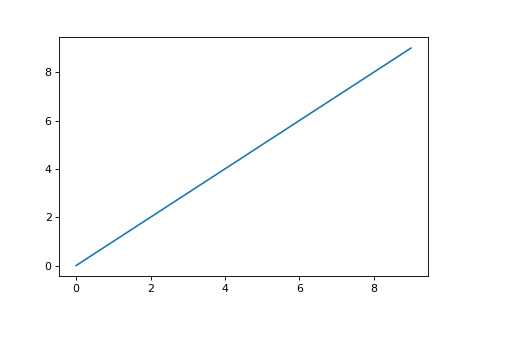

In [68]:
plt.plot(data)

<IPython.core.display.Javascript object>


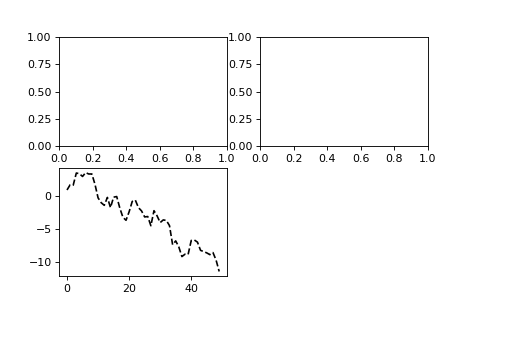

In [75]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)


In [76]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

<IPython.core.display.Javascript object>


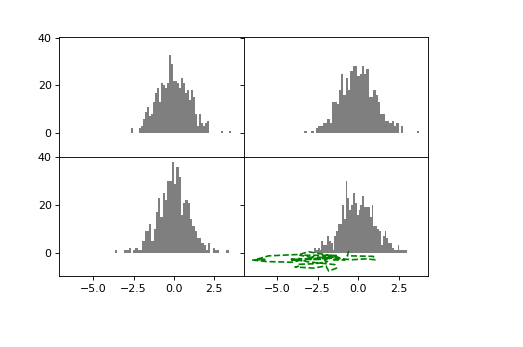

In [4]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

<IPython.core.display.Javascript object>


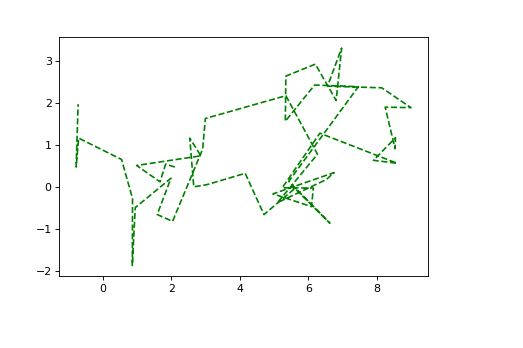

In [19]:
fig2, axes = plt.subplots()
plt.plot(np.random.randn(50).cumsum(),np.random.randn(50).cumsum(), 'g--')

In [15]:
a.plot?


In [18]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

<IPython.core.display.Javascript object>


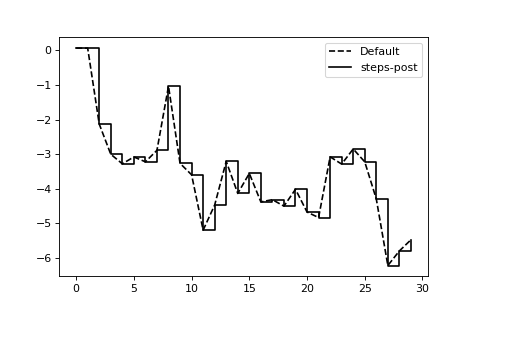

In [20]:
fig3, axes = plt.subplots()

In [21]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

In [22]:
plt.legend(loc='best')

In [12]:
ser.loc[2] = 4
ser.loc[4] = 9
ser

0    1.0
1    2.0
2    4.0
3    4.0
4    9.0
Name: orayt, dtype: float64

<IPython.core.display.Javascript object>


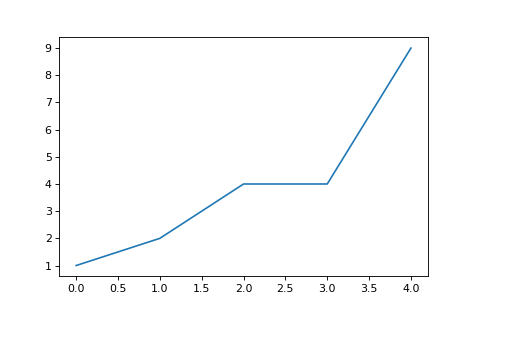

<AxesSubplot:>

In [13]:
ser.plot()

<IPython.core.display.Javascript object>


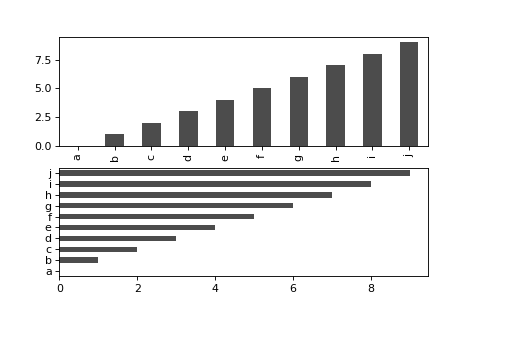

<AxesSubplot:>

In [18]:
fig, axes = plt.subplots(2,1)

data = pd.Series(np.arange(10), index = list('abcdefghij'))

data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [3]:
!type pfda_examples\tips.csv

total_bill,tip,smoker,day,time,size
16.99,1.01,No,Sun,Dinner,2
10.34,1.66,No,Sun,Dinner,3
21.01,3.5,No,Sun,Dinner,3
23.68,3.31,No,Sun,Dinner,2
24.59,3.61,No,Sun,Dinner,4
25.29,4.71,No,Sun,Dinner,4
8.77,2.0,No,Sun,Dinner,2
26.88,3.12,No,Sun,Dinner,4
15.04,1.96,No,Sun,Dinner,2
14.78,3.23,No,Sun,Dinner,2
10.27,1.71,No,Sun,Dinner,2
35.26,5.0,No,Sun,Dinner,4
15.42,1.57,No,Sun,Dinner,2
18.43,3.0,No,Sun,Dinner,4
14.83,3.02,No,Sun,Dinner,2
21.58,3.92,No,Sun,Dinner,2
10.33,1.67,No,Sun,Dinner,3
16.29,3.71,No,Sun,Dinner,3
16.97,3.5,No,Sun,Dinner,3
20.65,3.35,No,Sat,Dinner,3
17.92,4.08,No,Sat,Dinner,2
20.29,2.75,No,Sat,Dinner,2
15.77,2.23,No,Sat,Dinner,2
39.42,7.58,No,Sat,Dinner,4
19.82,3.18,No,Sat,Dinner,2
17.81,2.34,No,Sat,Dinner,4
13.37,2.0,No,Sat,Dinner,2
12.69,2.0,No,Sat,Dinner,2
21.7,4.3,No,Sat,Dinner,2
19.65,3.0,No,Sat,Dinner,2
9.55,1.45,No,Sat,Dinner,2
18.35,2.5,No,Sat,Dinner,4
15.06,3.0,No,Sat,Dinner,2
20.69,2.45,No,Sat,Dinner,4
17.78,3.27,No,Sat,Dinner,2
24.06,3.6,No,Sat,Dinner,3
16.31,2

In [3]:
tips = pd.read_csv('pfda_examples/tips.csv')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [7]:
pd.crosstab?

In [8]:
party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [10]:
#there's not much in 1 or 6 party size
party_counts = party_counts.loc[:,2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [12]:
#normalize to sum 1b
party_counts.sum(1)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [14]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


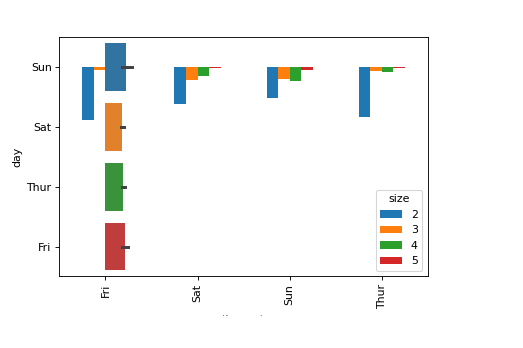

<AxesSubplot:xlabel='day'>

In [15]:
party_pcts.plot.bar()

In [16]:
tips['tip']

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [17]:
tips['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [18]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [6]:
tips['tips_pct'] = tips['tip']/(tips['total_bill']-tips['tip'])

In [20]:
tips.head()

,total_bill,tip,smoker,day,time,size,tips_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


In [24]:
sns.barplot(x='tips_pct', y='day', data=tips, orient='h')

<AxesSubplot:xlabel='tips_pct', ylabel='day'>

<IPython.core.display.Javascript object>


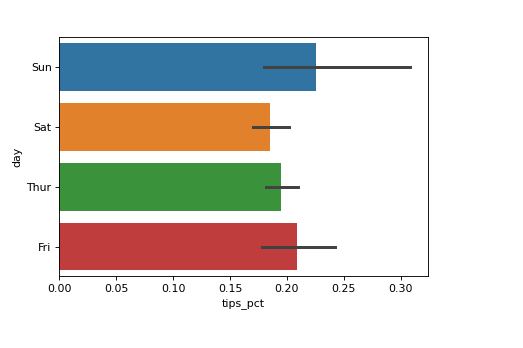

In [25]:
b

In [28]:
sns.barplot(x='tips_pct', y='day', data=tips, orient='h')

<AxesSubplot:xlabel='tips_pct', ylabel='day'>

<IPython.core.display.Javascript object>


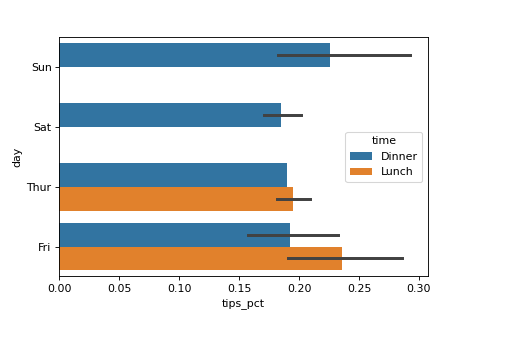

In [29]:
fig,axes = plt.subplots(1,1)

In [31]:
sns.barplot(x='tips_pct', y='day', hue='time', data=tips, orient='h')

<AxesSubplot:xlabel='tips_pct', ylabel='day'>

<IPython.core.display.Javascript object>


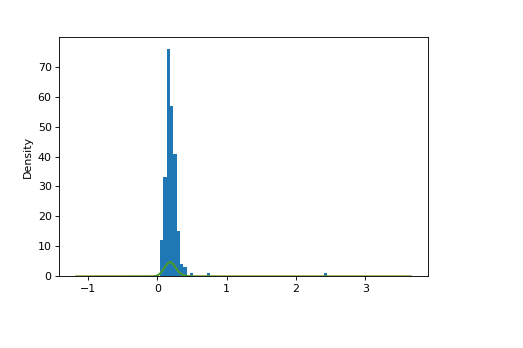

<AxesSubplot:ylabel='Frequency'>

In [7]:
tips['tips_pct'].plot.hist(bins=50)

In [9]:
tips['tips_pct'].plot.density()

<AxesSubplot:ylabel='Density'>

<IPython.core.display.Javascript object>


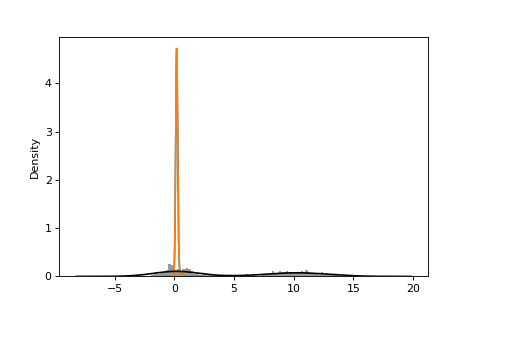

In [10]:
fig,axes = plt.subplots(1,1)

In [12]:
tips['tips_pct'].plot.kde()

<AxesSubplot:ylabel='Density'>

In [14]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
val = pd.Series(np.concatenate([comp1,comp2]))
sns.distplot(val, bins=100, color='k')

C:\Users\ericsson\Anaconda3\envs\studylord\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

<IPython.core.display.Javascript object>


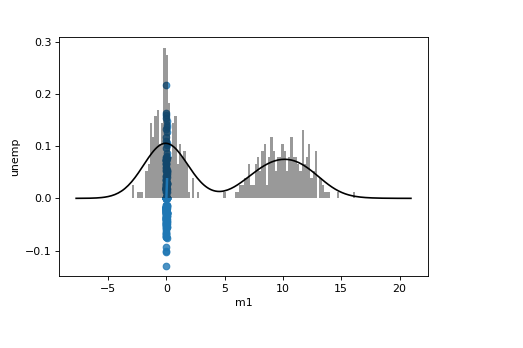

In [15]:
fig,axes = plt.subplots(1,1)

In [20]:
np.random.normal(10, 2, size=200)

array([12.40632921, 11.68946499,  7.81812521,  7.88204367,  9.75128924,
       10.40141775,  9.58185107,  9.91625557, 12.63472758, 12.39636953,
        8.79735213, 10.21946812, 11.46418624, 10.24106658, 12.89430561,
        8.21779013,  8.63961932, 11.83255122, 10.96589754, 10.33523506,
       13.38484679, 10.61025498, 11.37315897, 10.33333429, 11.06601516,
        5.57776413, 10.59296856, 14.54737579,  9.8059992 ,  8.06791833,
        8.97127686, 12.29523398,  9.06207687,  8.71089057, 12.18258107,
        9.47328137,  9.78534355, 10.45855863,  4.38375574,  8.32045368,
       12.05503982, 10.41013673, 12.80413223, 12.5053185 , 10.26348764,
       10.811954  ,  9.50201669,  8.95887931,  7.38728091, 12.64808547,
        8.46127421, 10.76622237, 12.82168972, 10.92065363,  9.12933054,
        7.15005424, 10.07483511,  8.97073791,  7.10218188,  8.67073985,
        7.15370867,  6.5040118 ,  7.47987712,  8.38510671, 10.99283576,
        9.24407461,  7.98854053,  5.61600216,  9.99031355,  9.99

In [19]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
val = pd.Series(np.concatenate([comp1,comp2]))
val

0      -0.253349
1      -0.747132
2      -0.069112
3      -1.889798
4       1.353823
         ...    
395    10.227516
396     7.994525
397     8.708791
398    12.613800
399     8.832463
Length: 400, dtype: float64

In [16]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
val = pd.Series(np.concatenate([comp1,comp2]))
sns.distplot(val, bins=100, color='k')

C:\Users\ericsson\Anaconda3\envs\studylord\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

In [22]:
!type pfda_examples\macrodata.csv

year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.0,0.0
1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.83,2.34,0.74
1959.0,3.0,2775.488,1751.8,289.226,491.26,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.5,5.2,180.007,2.31,1.19
1960.0,2.0,2834.39,1792.9,298.152,460.4,1966.1,29.55,140.2,2.68,5.2,180.671,0.14,2.55
1960.0,3.0,2839.022,1785.8,296.375,474.676,1967.8,29.75,140.9,2.36,5.6,181.528,2.7,-0.34
1960.0,4.0,2802.616,1788.2,259.764,476.434,1966.6,29.84,141.1,2.29,6.3,182.287,1.21,1.08
1961.0,1.0,2819.264,1787.7,266.405,475.854,1984.5,29.81,142.1,2.37,6.8,182.992,-0.4,2.77
1961.0,2.0,2872.005,1814.3,286.246,480.328,2014.4,29.92,142.9,2.29,7.0,183.691,1.47,0.81
1961.0,3.0,2918.419,1823

In [25]:
f = pd.read_csv('pfda_examples/macrodata.csv')
data = f[['cpi','m1','tbilrate','unemp']]
data

,cpi,m1,tbilrate,unemp
0,28.980,139.7,2.82,5.8
1,29.150,141.7,3.08,5.1
2,29.350,140.5,3.82,5.3
3,29.370,140.0,4.33,5.6
4,29.540,139.6,3.50,5.2
...,...,...,...,...
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2


In [27]:
trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


<IPython.core.display.Javascript object>


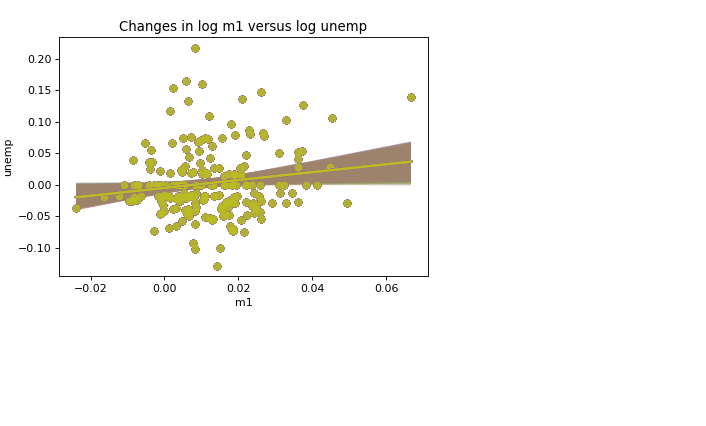

In [29]:
fig,axes = plt.subplots(1,1)

In [48]:
sns.regplot('m1','unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

C:\Users\ericsson\Anaconda3\envs\studylord\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

<IPython.core.display.Javascript object>


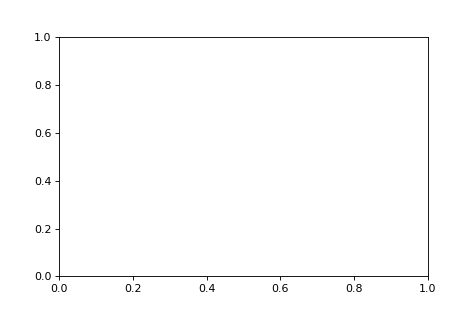

In [49]:
fig,axes = plt.subplots(1,1)

<IPython.core.display.Javascript object>


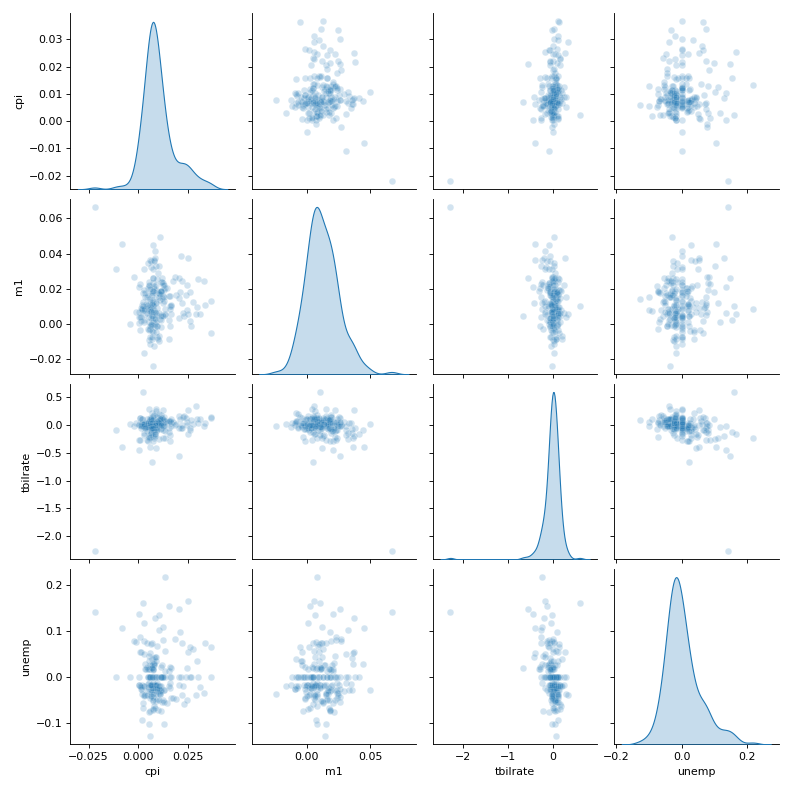

In [50]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

<IPython.core.display.Javascript object>


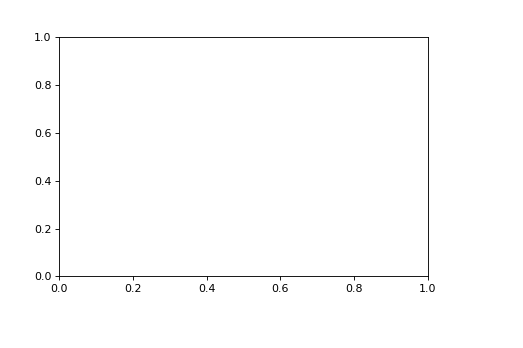

In [51]:
fig,axes = plt.subplots(1,1)

C:\Users\ericsson\Anaconda3\envs\studylord\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


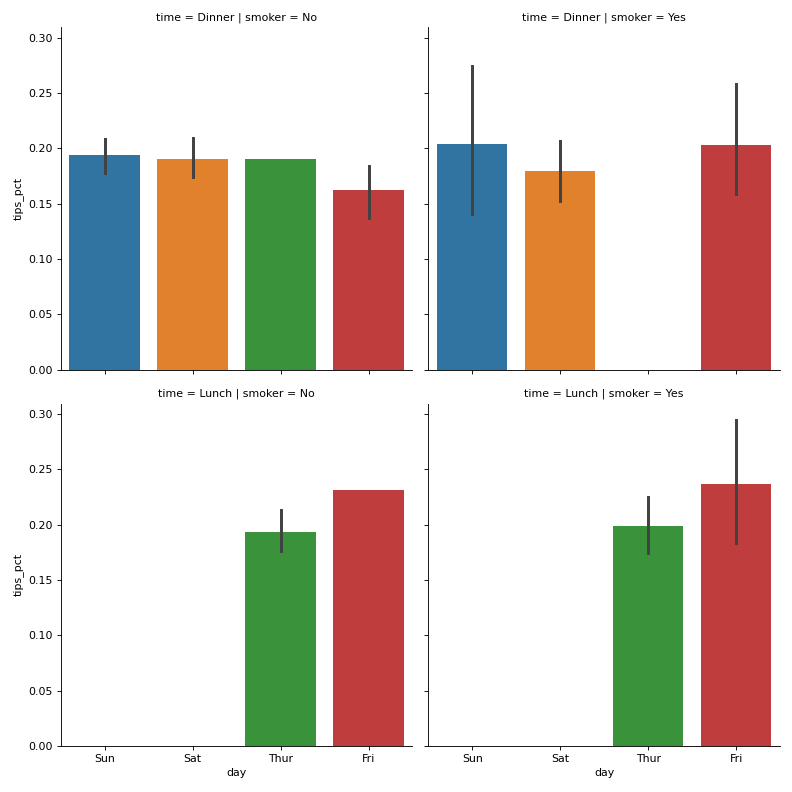

In [58]:
sns.factorplot(x='day', y='tips_pct', row='time', col='smoker', kind='bar',
             data=tips[tips.tips_pct < 1])

<IPython.core.display.Javascript object>


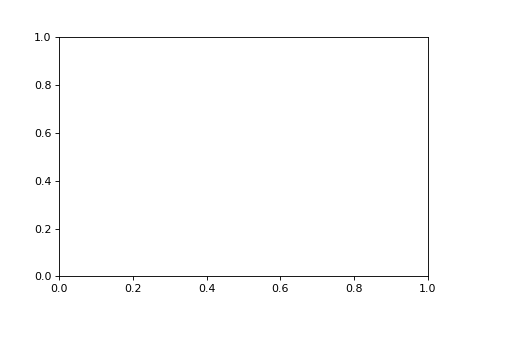

In [59]:
fig,axes = plt.subplots(1,1)

C:\Users\ericsson\Anaconda3\envs\studylord\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


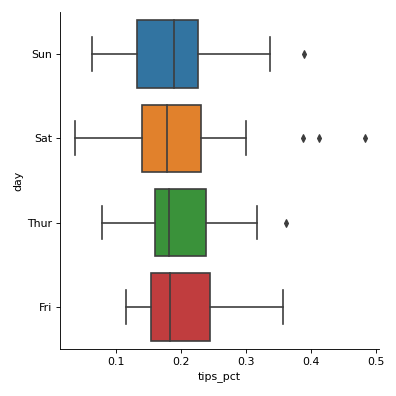

In [61]:
sns.factorplot(x='tips_pct', y='day', kind='box',
             data=tips[tips.tips_pct < 0.5])

In [3]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,1.411442,0.344413
1,a,two,-0.340707,0.631547
2,b,one,-1.321767,2.171716
3,b,two,-1.833559,-0.679648
4,a,one,-1.012243,-0.630036


In [20]:
grouped = df['data1'].groupby(df['key1'])
grouped.mean()

key1
a    0.019498
b   -1.577663
Name: data1, dtype: float64

In [16]:
means = df['data1'].groupby([df['key1'],df['key2']]).mean()
means

key1  key2
a     one     0.199600
      two    -0.340707
b     one    -1.321767
      two    -1.833559
Name: data1, dtype: float64

In [11]:
means.unstack()

key2,one,two
key1,,
a,0.199600,-0.340707
b,-1.321767,-1.833559


In [38]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.019498,0.115308
b,-1.577663,0.746034


In [24]:
df

,key1,key2,data1,data2
0,a,one,1.411442,0.344413
1,a,two,-0.340707,0.631547
2,b,one,-1.321767,2.171716
3,b,two,-1.833559,-0.679648
4,a,one,-1.012243,-0.630036


In [30]:
for k1,group in df.groupby('key1'):
    print(name)
    print(group)

b
  key1 key2     data1     data2
0    a  one  1.411442  0.344413
1    a  two -0.340707  0.631547
4    a  one -1.012243 -0.630036
b
  key1 key2     data1     data2
2    b  one -1.321767  2.171716
3    b  two -1.833559 -0.679648


In [34]:
for (k1,k2), group in df.groupby(['key1','key2']):
    print((k1,k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one  1.411442  0.344413
4    a  one -1.012243 -0.630036
('a', 'two')
  key1 key2     data1     data2
1    a  two -0.340707  0.631547
('b', 'one')
  key1 key2     data1     data2
2    b  one -1.321767  2.171716
('b', 'two')
  key1 key2     data1     data2
3    b  two -1.833559 -0.679648


In [35]:
list(df.groupby('key1'))

[('a',
    key1 key2     data1     data2
  0    a  one  1.411442  0.344413
  1    a  two -0.340707  0.631547
  4    a  one -1.012243 -0.630036),
 ('b',
    key1 key2     data1     data2
  2    b  one -1.321767  2.171716
  3    b  two -1.833559 -0.679648)]

In [41]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

,key1,key2,data1,data2
2,b,one,-1.321767,2.171716
3,b,two,-1.833559,-0.679648


In [44]:
df

,key1,key2,data1,data2
0,a,one,1.411442,0.344413
1,a,two,-0.340707,0.631547
2,b,one,-1.321767,2.171716
3,b,two,-1.833559,-0.679648
4,a,one,-1.012243,-0.630036


In [43]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [45]:
grouped = df.groupby(df.dtypes, axis=1)

In [47]:
for k, group in grouped:
    print(k)
    print(group)

float64
      data1     data2
0  1.411442  0.344413
1 -0.340707  0.631547
2 -1.321767  2.171716
3 -1.833559 -0.679648
4 -1.012243 -0.630036
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


In [57]:
df.groupby(['key1','key2'])['data2'].mean()

key1  key2
a     one    -0.142811
      two     0.631547
b     one     2.171716
      two    -0.679648
Name: data2, dtype: float64

In [59]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people

,a,b,c,d,e
Joe,0.572148,0.900220,0.547725,-1.304404,0.144056
Steve,0.535287,2.803700,-1.207124,1.576553,-0.169294
Wes,-0.780782,0.131962,1.497256,-1.122087,-0.683233
Jim,0.393594,-0.546799,-0.716124,-0.951116,-0.247952
Travis,2.635726,0.307918,0.905368,-0.138572,-0.412263


In [61]:
people.iloc[2:3,[1,2]] = np.nan
people

,a,b,c,d,e
Joe,0.572148,0.900220,0.547725,-1.304404,0.144056
Steve,0.535287,2.803700,-1.207124,1.576553,-0.169294
Wes,-0.780782,NaN,NaN,-1.122087,-0.683233
Jim,0.393594,-0.546799,-0.716124,-0.951116,-0.247952
Travis,2.635726,0.307918,0.905368,-0.138572,-0.412263


In [64]:
mapping = {'a': 'pula', 'b': 'pula', 'c': 'asul',
           'd': 'asul', 'e': 'pula', 'f' : 'kahel'}

by_column = people.groupby(mapping, axis=1)
by_column.sum()

,asul,pula
Joe,-0.756679,1.616424
Steve,0.369429,3.169693
Wes,-1.122087,-1.464015
Jim,-1.667240,-0.401156
Travis,0.766796,2.531381


In [72]:
a = np.array(list(mapping.values()))
a

array(['pula', 'pula', 'asul', 'asul', 'pula', 'kahel'], dtype='<U5')

In [73]:
people.groupby(len).sum()

,a,b,c,d,e
3,0.184960,0.353421,-0.168399,-3.377607,-0.787128
5,0.535287,2.803700,-1.207124,1.576553,-0.169294
6,2.635726,0.307918,0.905368,-0.138572,-0.412263


In [75]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                     [1, 3, 5, 1, 3]],
                                    names=['cty', 'tenor'])



In [77]:
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.807963 -0.503458 -1.944869 -0.462391 -0.949623
1     -0.031994  0.959539  0.971165  1.081439 -1.181929
2      1.021522 -0.763006  1.047507 -1.480032 -0.286244
3     -0.799836  0.332643  0.335265  0.820705  1.669042

In [78]:
hier_df.groupby(level='cty', axis=1).sum()

cty,JP,US
0,-1.412014,-1.640364
1,-0.100489,1.898709
2,-1.766276,1.306023
3,2.489747,-0.131928


In [79]:
df

,key1,key2,data1,data2
0,a,one,1.411442,0.344413
1,a,two,-0.340707,0.631547
2,b,one,-1.321767,2.171716
3,b,two,-1.833559,-0.679648
4,a,one,-1.012243,-0.630036


In [86]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [87]:
grouped = df.groupby('key1')
df.groupby('key1')['data1'].agg(peak_to_peak)

key1
a    2.423685
b    0.511793
Name: data1, dtype: float64

In [82]:
grouped['data1'].quantile(0.9)

key1
a    1.061012
b   -1.372946
Name: data1, dtype: float64

In [88]:
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,2.423685,1.261583
b,0.511793,2.851364


In [24]:
tips = pd.read_csv('pfda_examples/tips.csv')
tips['tip_pct'] = tips['tip']/tips['total_bill']
tips



,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [93]:
grouped_pct = tips.groupby(['day','smoker'])['tip_pct']



In [94]:
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [8]:
grouped = tips.groupby(['day','smoker'])

In [14]:
functions = ['count', 'mean', 'max']
result1 = grouped['tip_pct'].agg(functions)
result2 = grouped['total_bill'].agg(functions)
gg = pd.concat({'tip_pct':result1, 'total_bill':result2}, axis=1)
gg

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [15]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [25]:
a = grouped.agg({'tip': np.max,'size':'sum'})

In [22]:
a = grouped.agg({'tip_pct':[('genggeng','min'),('orayt','max'),
                        ('beep','mean'),('orayt','std')],'size':'sum'})
a

tip_pct                               size
             genggeng     orayt      beep     orayt  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

In [26]:
a.reset_index()

,day,smoker,tip,size
0,Fri,No,3.50,9
1,Fri,Yes,4.73,31
2,Sat,No,9.00,115
3,Sat,Yes,10.00,104
4,Sun,No,6.00,167
5,Sun,Yes,6.50,49
6,Thur,No,6.70,112
7,Thur,Yes,5.00,40


In [37]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

In [39]:
top(tips)

,total_bill,tip,smoker,day,time,size,tip_pct
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [40]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [43]:
tips.groupby(['smoker','day']).apply(top, n=1, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [45]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [46]:
result.unstack()

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

In [49]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [48]:
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [51]:
frame = pd.DataFrame({'data1':np.random.randn(1000),
                     'data2':np.random.randn(1000)})
frame.head()

,data1,data2
0,-1.301233,-0.197400
1,-0.947907,-0.690566
2,0.733777,-0.755554
3,1.050989,-0.934754
4,-1.500296,0.699537


In [52]:
quartiles = pd.cut(frame.data1,4)
quartiles[:10]

0    (-1.859, -0.238]
1    (-1.859, -0.238]
2     (-0.238, 1.383]
3     (-0.238, 1.383]
4    (-1.859, -0.238]
5     (-0.238, 1.383]
6     (-0.238, 1.383]
7    (-1.859, -0.238]
8     (-0.238, 1.383]
9    (-1.859, -0.238]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.486, -1.859] < (-1.859, -0.238] < (-0.238, 1.383] < (1.383, 3.003]]

In [53]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

In [55]:
frame


,data1,data2
0,-1.301233,-0.197400
1,-0.947907,-0.690566
2,0.733777,-0.755554
3,1.050989,-0.934754
4,-1.500296,0.699537
...,...,...
995,-1.912082,-1.472015
996,0.384137,1.393083
997,0.826852,-1.930750
998,-0.512034,-0.720716


In [60]:
grouped = frame.data2.groupby(quartiles)
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
"(-3.486, -1.859]",-1.936987,2.422089,32.0,0.218012
"(-1.859, -0.238]",-2.677173,3.150631,406.0,0.034618
"(-0.238, 1.383]",-3.044902,3.145819,494.0,0.008528
"(1.383, 3.003]",-2.348425,2.025528,68.0,-0.165072


In [64]:
grouping = pd.qcut(frame.data1, 4, labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
0,-1.993705,2.783631,250.0,0.071731
1,-2.971876,3.150631,250.0,0.090828
2,-3.044902,2.398906,250.0,-0.043992
3,-2.659575,2.514269,250.0,-0.062490


In [65]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']

group_key = ['East'] * 4 + ['West'] * 4

data = pd.Series(np.random.randn(8), index=states)

data

Ohio         -0.800735
New York     -0.213643
Vermont      -0.057237
Florida      -0.954471
Oregon       -0.971560
Nevada        0.651802
California   -0.885504
Idaho        -0.615240
dtype: float64

In [67]:
data[['Vermont','Idaho','Nevada']] = np.nan
data

Ohio         -0.800735
New York     -0.213643
Vermont            NaN
Florida      -0.954471
Oregon       -0.971560
Nevada             NaN
California   -0.885504
Idaho              NaN
dtype: float64

In [68]:
data.groupby(group_key).mean()

East   -0.656283
West   -0.928532
dtype: float64

In [69]:
fill_mean = lambda g: g.fillna(g.mean())

data.groupby(group_key).apply(fill_mean)

Ohio         -0.800735
New York     -0.213643
Vermont      -0.656283
Florida      -0.954471
Oregon       -0.971560
Nevada       -0.928532
California   -0.885504
Idaho        -0.928532
dtype: float64

In [72]:
suits = ['H','S','D','C']

In [6]:
card_val = (list(range(1,11))+ [10]*3)*4

In [7]:
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
base_names

['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'K', 'Q']

In [8]:
cards=[]
for suit in ['H','S','D','C']:
    cards.extend(str(num)+suit for num in base_names)
    
deck = pd.Series(card_val, index=cards)
deck.head()

AH    1
2H    2
3H    3
4H    4
5H    5
dtype: int64

In [14]:
def draw(deck, n=5):
    return deck.sample(n)
draw(deck)

7C    7
8C    8
8H    8
5C    5
3D    3
dtype: int64

In [15]:
get_suit = lambda card: card[-1]

In [20]:
deck.groupby(get_suit).apply(draw, n=2)

C  8C     8
   KC    10
D  AD     1
   5D     5
H  6H     6
   QH    10
S  7S     7
   KS    10
dtype: int64

In [21]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

QC    10
KC    10
6D     6
3D     3
JH    10
3H     3
6S     6
9S     9
dtype: int64

In [22]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                'b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})
df

,category,data,weights
0,a,0.774317,0.486151
1,a,0.053754,0.540280
2,a,0.786503,0.865693
3,a,0.681211,0.433865
4,b,0.007506,0.982876
5,b,1.303236,0.099160
6,b,0.142308,0.978577
7,b,0.273961,0.811811


In [25]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])

In [26]:
grouped.apply(get_wavg)

category
a    0.594113
b    0.173467
dtype: float64

In [8]:
close_px = pd.read_csv('pfda_examples/stock_px_2.csv', parse_dates=True,
                       index_col=0)
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [31]:
close_px[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [7]:
spx_corr = lambda x: x.corrwith(x['SPX'])

In [9]:
rets = close_px.pct_change().dropna()
rets

,AAPL,MSFT,XOM,SPX
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
2003-01-09,0.008242,0.029094,0.021159,0.019386
...,...,...,...,...
2011-10-10,0.051406,0.026286,0.036977,0.034125
2011-10-11,0.029526,0.002227,-0.000131,0.000544
2011-10-12,0.004747,-0.001481,0.011669,0.009795
2011-10-13,0.015515,0.008160,-0.010238,-0.002974


In [13]:
get_year = lambda x: x.year
by_year = rets.groupby(get_year)

In [36]:
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [11]:
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [16]:
a = by_year.apply(regress, 'AAPL', ['SPX'])
a

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


<IPython.core.display.Javascript object>


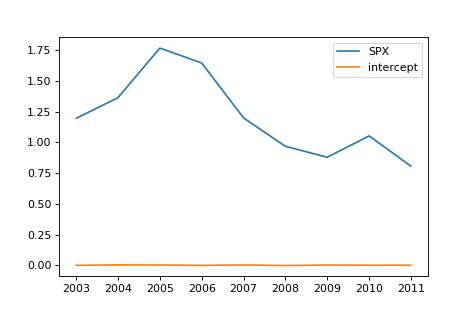

<AxesSubplot:>

In [22]:
a.plot()

In [28]:
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [32]:
tips = pd.read_csv('pfda_examples/tips.csv')

tips['tips_pct'] = tips['tip']/tips['total_bill']
tips

,total_bill,tip,smoker,day,time,size,tips_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [34]:
tips.groupby(['day','smoker']).mean()

total_bill       tip      size  tips_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.151650
     Yes      16.813333  2.714000  2.066667  0.174783
Sat  No       19.661778  3.102889  2.555556  0.158048
     Yes      21.276667  2.875476  2.476190  0.147906
Sun  No       20.506667  3.167895  2.929825  0.160113
     Yes      24.120000  3.516842  2.578947  0.187250
Thur No       17.113111  2.673778  2.488889  0.160298
     Yes      19.190588  3.030000  2.352941  0.163863

In [33]:
tips.pivot_table(index=['day','smoker'])

size       tip  tips_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [36]:
tips.pivot_table(['tips_pct', 'size'], 
                 index=['time', 'day'],
                 columns='smoker')

size            tips_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [37]:
tips.pivot_table(['tips_pct', 'size'], 
                 index=['time', 'day'],
                 columns='smoker', margins=True)

size                      tips_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [42]:
tips.pivot_table(['tips_pct', 'size'], 
                 index=['time', 'day'],
                 columns='smoker', aggfunc='count', margins=True)

size            tips_pct           
smoker          No   Yes  All       No   Yes  All
time   day                                       
Dinner Fri     3.0   9.0   12      3.0   9.0   12
       Sat    45.0  42.0   87     45.0  42.0   87
       Sun    57.0  19.0   76     57.0  19.0   76
       Thur    1.0   NaN    1      1.0   NaN    1
Lunch  Fri     1.0   6.0    7      1.0   6.0    7
       Thur   44.0  17.0   61     44.0  17.0   61
All          151.0  93.0  244    151.0  93.0  244

In [45]:
tips.pivot_table('tips_pct', index=['time', 'size', 'smoker'],
                 columns='day', aggfunc='mean', fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706